<a href="https://colab.research.google.com/github/Sandraodion/Predicting-Apartment-Prices-in-Buenos-Aires-using-Regression-Models/blob/main/Predicting_Apartment_Prices_in_Buenos_Aires_using_Regression_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Python Notebooks and Scripting
## - Predicting Apartment Prices in Buenos Aires using Regression Models

**TABLE OF CONTENTS**

1. Introduction
   - 1.1 About Predicting Apartment Prices in Buenos Aires
   - 1.2 Data Source
   - 1.3 Objective
   - 1.4 Methodology
   - 1.5 Significance

2. Data Preparation
   - 2.1 Importing Libraries
   - 2.2 Reading and Understanding Data

3. Data Cleaning, Exploration and Manipulation

4. Feature Engineering

5. Exploratory Data Analysis
   - 5.1 Univariate Analysis
     - 5.1.1 Variable Price
     - 5.1.2 Variable Price_Categories
     - 5.1.3 Variable Surface Area
     - 5.1.4 Variable Latitude
     - 5.1.5 Variable Longitude
     - 5.1.6 Variable Neighbourhood
   - 5.2 Bivariate Analysis
     - 5.2.1 Variable ‘Price’ vs ‘Price Categories’
     - 5.2.2 Variable  Price vs Surface Area Distribution
     - 5.2.3 Variable ‘Price’ vs ‘Latitude’ Distribution
     - 5.2.4 Variable ‘Price’ vs ‘Longitude’ Distribution
     - 5.2.5 Variable ‘Price' vs ‘Neighbourhood’Distribution
   - 5.3 Multivariate Analysis
     - 5.3.1 Variable ‘Price’ vs ‘Surface Area’ vs ‘Neighbourhood’ Distribution
     - 5.3.2 Variable ‘Price’ vs ‘Latitude’ vs ‘Longitude’ Distribution
     - 5.3.3 Correlation Matrix of the Numerical Variables
     

6. Splitting Data

7. Modelling and Evaluation
   - 6.1 Base line
   - 6.2 Iteration
   - 6.3 Evaluation

8. Communication of Results to Stakeholders

9. Conclusion

References

# 1.0 Introduction
## 1.1 About Predicting Apartment Prices in Buenos Aires
The vibrant and varied real estate market of Buenos Aires, Argentina's largest city and capital, presents an intriguing opportunity for predictive analytics. Accurately forecasting apartment prices in this market is essential for various stakeholders, including buyers, sellers, real estate agents, and investors. With the proliferation of data and advancements in machine learning, it's feasible to create models that offer valuable insights into property values.

## 1.2 Data Source
This project's dataset is sourced from Kaggle.com, a well-known platform for its extensive datasets ideal for machine learning and data analysis. The dataset includes a wide range of features relevant to apartment listings in Buenos Aires, such as:

 - Location: Details about neighborhoods and specific areas within the city.
 - Property Characteristics: Information on size (square meters) and additional amenities.
 - Market Variables: Listing prices, local price and price in USD, and other market-related factors.

## 1.3 Objective
The main goal of this project is to develop a predictive model that can accurately estimate apartment prices in Buenos Aires. Such a model will help potential buyers and sellers make informed decisions, enable real estate agents to offer better advice, and assist investors in identifying profitable opportunities in the market. This will be achieved using some variables listed below:
     - The surface area of the apartments
     - The Location of the apartments using Latitude and Longitude
     - The neighborhood or the city of the apartment

Other goals are:
 - We will focus on **"Capital Federal"** which refers specifically to the Federal Capital of Argentina, which is the city of Buenos Aires.
 - More than 50% of the property types in the dataset are apartments hence we will focus only on apartments
 - We will also focus on apartments that cost less than $400,000
 - Create a function "make_prediction" that takes these four arguments and returns our model's prediction for an apartment price.
 - To aid Visualisation for our non-technical audiences, we will deploy an interactive dashboard where a user can supply values and receive a prediction

## 1.4 Methodology
To achieve this goal, the project will follow these key steps:

 - **Data Exploration and Cleaning**: Initial examination to understand the dataset's structure, identify missing values, and perform necessary cleaning.
 - **Feature Engineering**: Creation or modification of features to enhance the model's predictive capabilities.
 - **Exploratory Data Analysis**: In-depth analysis to uncover patterns, correlations, and insights within the data.
 - **Splitting Data**: Dividing the dataset into training and testing sets to ensure the model's performance can be evaluated properly.
 - **Model Selection and Training**: Comparing various machine learning algorithms to identify the best model. This includes methods like linear regression, decision trees, random forests, and advanced techniques such as gradient boosting and neural networks.
 - **Model Evaluation**: Assessing model performance using metrics like Mean Absolute Error (MAE), Mean Squared Error (MSE), and R-squared.
 - **Communication of Results to Stakeholders**: Presenting the findings and the performance of the predictive model in a clear and actionable manner to all relevant stakeholders.

## 1.5 Significance
Predicting apartment prices accurately in Buenos Aires has significant implications. It can facilitate transparent and fair transactions in the real estate market, help identify trends and patterns, and contribute to the city's economic development. Moreover, the insights from this project can be applied to other cities with similar real estate dynamics, broadening its usefulness.

In summary, this project aims to leverage data science and machine learning to provide actionable insights into Buenos Aires' real estate market. By developing a reliable predictive model, we aim to make the process of buying and selling apartments more efficient and informed.

# 2.0 Data Preparation
## 2.1. Importing Libraries

Before beginning data exploration, cleaning, and analysis, we need to import the essential libraries. These libraries offer crucial functions and tools for managing data, conducting statistical analysis, and constructing predictive models.

In [ ]:
#Importing Data and Data Cleaning
import pandas as pd
import numpy as np

#Visualization
import seaborn as sns
import matplotlib.pyplot as plt

#Encoding and Preprocessing
from category_encoders import OneHotEncoder #Ensure pip install category_encoders
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

#Model Building
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, BayesianRidge
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor #Ensure pip install xgboost

#Model Evaluation
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.utils.validation import check_is_fitted

#Model Training Utilities
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split

#Interactive Widgets
import ipywidgets as widgets
from ipywidgets import Dropdown, FloatSlider, IntSlider, interact

# Setting up matplotlib for inline plotting (if using Jupyter Notebook)
%matplotlib inline

# Suppressing warnings for cleaner output
import warnings
warnings.filterwarnings('ignore')


In [ ]:
#pip install category_encoders

In [ ]:
#pip install xgboost

## 2.2. Reading and Understanding the Data

In [ ]:
# Reading the dataset
df = pd.read_csv("buenos-aires-real-estate-1.csv")

In [ ]:
# Familiarising with the dataset
df.head()

operation property_type                            place_with_parent_names  \
0      sell     apartment           |Argentina|Capital Federal|Villa Crespo|   
1      sell         house  |Argentina|Bs.As. G.B.A. Zona Oeste|La Matanza...   
2      sell         house  |Argentina|Bs.As. G.B.A. Zona Oeste|Morón|Cast...   
3      sell         house  |Argentina|Bs.As. G.B.A. Zona Oeste|Tres de Fe...   
4      sell     apartment              |Argentina|Capital Federal|Chacarita|   

                         lat-lon     price currency  \
0  -34.6047834183,-58.4586812499  180000.0      USD   
1                            NaN  250000.0      USD   
2         -34.6497002,-58.658073  410000.0      USD   
3        -34.5957086,-58.5669503  180000.0      USD   
4  -34.5846508988,-58.4546932614  129000.0      USD   

   price_aprox_local_currency  price_aprox_usd  surface_total_in_m2  \
0                   2729232.0         180000.0                120.0   
1                   3790600.0         250000.0                117.0   
2                   6216584.0         410000.0                410.0   
3                   2729232.0         180000.0                200.0   
4                   1955949.6         129000.0                 76.0   

   surface_covered_in_m2  price_usd_per_m2  price_per_m2  floor  rooms  \
0                  110.0       1500.000000   1636.363636    NaN    4.0   
1                  120.0       2136.752137   2083.333333    NaN    4.0   
2                  220.0       1000.000000   1863.636364    NaN    NaN   
3                  135.0        900.000000   1333.333333    NaN    5.0   
4                   70.0       1697.368421   1842.857143    NaN    NaN   

   expenses                                      properati_url  
0       NaN  http://villa-crespo.properati.com.ar/12egq_ven...  
1       NaN  http://ramos-mejia.properati.com.ar/s7pd_venta...  
2       NaN  http://castelar-moron.properati.com.ar/11vgn_v...  
3       NaN  http://tres-de-febrero.properati.com.ar/7f7u_v...  
4       NaN  http://chacarita.properati.com.ar/10qlv_venta_...

In [ ]:
# Getting a view of the beginning and end of the dataset
df

operation property_type  \
0         sell     apartment   
1         sell         house   
2         sell         house   
3         sell         house   
4         sell     apartment   
...        ...           ...   
8601      sell     apartment   
8602      sell         house   
8603      sell         house   
8604      sell     apartment   
8605      sell            PH   

                                place_with_parent_names  \
0              |Argentina|Capital Federal|Villa Crespo|   
1     |Argentina|Bs.As. G.B.A. Zona Oeste|La Matanza...   
2     |Argentina|Bs.As. G.B.A. Zona Oeste|Morón|Cast...   
3     |Argentina|Bs.As. G.B.A. Zona Oeste|Tres de Fe...   
4                 |Argentina|Capital Federal|Chacarita|   
...                                                 ...   
8601            |Argentina|Capital Federal|San Nicolás|   
8602  |Argentina|Bs.As. G.B.A. Zona Norte|San Fernando|   
8603  |Argentina|Bs.As. G.B.A. Zona Norte|Tigre|Nord...   
8604                  |Argentina|Capital Federal|Boedo|   
8605         |Argentina|Bs.As. G.B.A. Zona Norte|Pilar|   

                            lat-lon     price currency  \
0     -34.6047834183,-58.4586812499  180000.0      USD   
1                               NaN  250000.0      USD   
2            -34.6497002,-58.658073  410000.0      USD   
3           -34.5957086,-58.5669503  180000.0      USD   
4     -34.5846508988,-58.4546932614  129000.0      USD   
...                             ...       ...      ...   
8601          -34.601455,-58.378132  125000.0      USD   
8602                            NaN  480000.0      USD   
8603                            NaN  510000.0      USD   
8604                            NaN   78000.0      USD   
8605        -34.4541346,-58.9028747   65000.0      USD   

      price_aprox_local_currency  price_aprox_usd  surface_total_in_m2  \
0                      2729232.0         180000.0                120.0   
1                      3790600.0         250000.0                117.0   
2                      6216584.0         410000.0                410.0   
3                      2729232.0         180000.0                200.0   
4                      1955949.6         129000.0                 76.0   
...                          ...              ...                  ...   
8601                   1895300.0         125000.0                  NaN   
8602                   7277952.0         480000.0                683.0   
8603                   7732824.0         510000.0                  0.0   
8604                   1182667.2          78000.0                 52.0   
8605                    985556.0          65000.0                 90.0   

      surface_covered_in_m2  price_usd_per_m2  price_per_m2  floor  rooms  \
0                     110.0       1500.000000   1636.363636    NaN    4.0   
1                     120.0       2136.752137   2083.333333    NaN    4.0   
2                     220.0       1000.000000   1863.636364    NaN    NaN   
3                     135.0        900.000000   1333.333333    NaN    5.0   
4                      70.0       1697.368421   1842.857143    NaN    NaN   
...                     ...               ...           ...    ...    ...   
8601                   70.0               NaN   1785.714286    2.0    3.0   
8602                  235.0        702.781845   2042.553191    NaN    NaN   
8603                  256.0               NaN   1992.187500    NaN    NaN   
8604                   52.0       1500.000000   1500.000000    NaN    NaN   
8605                   60.0        722.222222   1083.333333    NaN    NaN   

      expenses                                      properati_url  
0          NaN  http://villa-crespo.properati.com.ar/12egq_ven...  
1          NaN  http://ramos-mejia.properati.com.ar/s7pd_venta...  
2          NaN  http://castelar-moron.properati.com.ar/11vgn_v...  
3          NaN  http://tres-de-febrero.properati.com.ar/7f7u_v...  
4          NaN  http://chacarita.properati.com.ar/10qlv_vent

In [ ]:
#Getting information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8606 entries, 0 to 8605
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   operation                   8606 non-null   object 
 1   property_type               8606 non-null   object 
 2   place_with_parent_names     8606 non-null   object 
 3   lat-lon                     6936 non-null   object 
 4   price                       7590 non-null   float64
 5   currency                    7590 non-null   object 
 6   price_aprox_local_currency  7590 non-null   float64
 7   price_aprox_usd             7590 non-null   float64
 8   surface_total_in_m2         5946 non-null   float64
 9   surface_covered_in_m2       7268 non-null   float64
 10  price_usd_per_m2            4895 non-null   float64
 11  price_per_m2                6520 non-null   float64
 12  floor                       1259 non-null   float64
 13  rooms                       4752 

In [ ]:
#summary descriptive analysis of the dataset
df.describe()

price  price_aprox_local_currency  price_aprox_usd  \
count  7.590000e+03                7.590000e+03     7.590000e+03   
mean   2.982076e+05                3.591849e+06     2.368919e+05   
std    5.074586e+05                4.758038e+06     3.138051e+05   
min    0.000000e+00                0.000000e+00     0.000000e+00   
25%    9.500000e+04                1.364616e+06     9.000000e+04   
50%    1.550000e+05                2.228873e+06     1.470000e+05   
75%    3.000000e+05                4.018036e+06     2.650000e+05   
max    1.111111e+07                1.212992e+08     8.000000e+06   

       surface_total_in_m2  surface_covered_in_m2  price_usd_per_m2  \
count          5946.000000            7268.000000       4895.000000   
mean            252.829129             140.324436       1718.750516   
std             938.374862             764.092931       1577.024430   
min               0.000000               0.000000          0.000000   
25%              48.000000              46.000000        916.666667   
50%              95.000000              76.500000       1600.000000   
75%             250.000000             160.000000       2186.130431   
max           62034.000000           62034.000000      54990.000000   

        price_per_m2        floor        rooms      expenses  
count    6520.000000  1259.000000  4752.000000  8.750000e+02  
mean     3732.986942     8.802224     3.066498  2.289371e+16  
std     12265.592013    59.640309     1.386481  6.772052e+17  
min         2.224587     1.000000     1.000000  1.000000e+00  
25%      1450.000000     2.000000     2.000000  8.000000e+02  
50%      1961.109231     3.000000     3.000000  1.650000e+03  
75%      2677.707373     6.000000     4.000000  3.400000e+03  
max    450000.000000  1503.000000    20.000000  2.003200e+19

In [ ]:
#checking the head of the proposed response variable
df["price_aprox_usd"].head()

0    180000.0
1    250000.0
2    410000.0
3    180000.0
4    129000.0
Name: price_aprox_usd, dtype: float64

In [ ]:
#checking the unique count of the property type and their distribution
df["property_type"].unique()

array(['apartment', 'house', 'PH', 'store'], dtype=object)

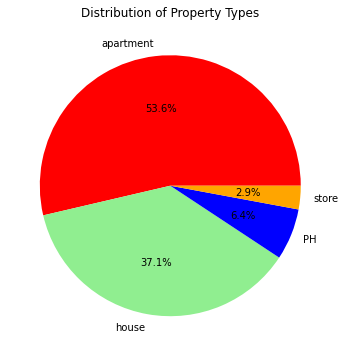

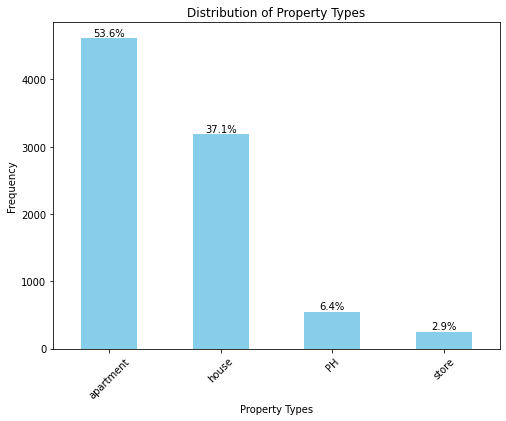

In [ ]:
# Calculate value counts for each property type
property_type_counts = df['property_type'].value_counts()
total_count = property_type_counts.sum()

# Plotting pie chart
plt.figure(figsize=(8, 6))
plt.pie(property_type_counts, labels=property_type_counts.index, autopct='%1.1f%%', colors=['red', 'lightgreen', 'blue', 'orange'])
plt.title('Distribution of Property Types')
plt.show()

# Plotting histogram (bar chart)
plt.figure(figsize=(8, 6))
ax = property_type_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Property Types')
plt.xlabel('Property Types')
plt.ylabel('Frequency')
plt.xticks(rotation=45)

# Add percentage annotations on bars
for i in ax.patches:
    percentage = f'{(i.get_height() / total_count) * 100:.1f}%'
    ax.text(i.get_x() + i.get_width() / 2., i.get_height() + 0.5, percentage, ha='center', va='bottom')

plt.show()

## Property Type in the Dataset
The dataset includes various types of properties listed for sale or rent in Buenos Aires, categorized as follows:

 - **Apartment**: Comprising 53.6% of the dataset.
 - **House**: Making up 37.1% of the dataset.
 - **PH (Propiedad Horizontal)**: Accounting for 6.4% of the dataset. These are typically units within smaller buildings, resembling townhouses or duplexes.
 - **Store**: Representing 2.9% of the dataset, these are commercial retail spaces.
Given that apartments make up the majority at 53.6%, we will focus our analysis specifically on this property type.

## Focus on Apartments
### Reason for Focusing on Apartments
 1. **Majority Representation**: With apartments constituting over half of the dataset, they provide a substantial sample size for analysis, leading to more reliable and accurate predictive modeling.
 2. **Market Relevance**: In urban centers like Buenos Aires, apartments are the predominant form of housing. They cater to a diverse population, from young professionals to families, making the apartment market a critical segment of the real estate industry.
 3. **Data Uniformity**: Focusing on a single property type reduces variability caused by differences between property categories (e.g., commercial stores versus residential houses). This uniformity allows for more precise modeling and analysis.
 4. **Economic Significance**: The apartment market heavily influences the overall real estate market in Buenos Aires. Understanding the price dynamics of apartments can provide valuable insights into broader economic and housing trends in the city.

### Analysis Approach
By filtering our data to include only apartments, we streamline our analysis and ensure that our predictive models are tailored specifically to this property type. This approach enhances the accuracy of our predictions and provides actionable insights relevant to a significant portion of Buenos Aires's real estate market.

Focusing our analysis on apartments allows us to leverage their majority representation in the dataset and gain detailed insights into the most prevalent type of housing in Buenos Aires. This targeted approach will help us develop a predictive model that accurately estimates apartment prices, providing valuable information for buyers, sellers, real estate agents, and investors.

In [ ]:
#checking to see the province to use and how distributed they are
df["borough"] = df["place_with_parent_names"].str.split("|", expand=True)[2]
#df.drop(columns="place_with_parent_names", inplace=True)


In [ ]:
df.head()

operation property_type                            place_with_parent_names  \
0      sell     apartment           |Argentina|Capital Federal|Villa Crespo|   
1      sell         house  |Argentina|Bs.As. G.B.A. Zona Oeste|La Matanza...   
2      sell         house  |Argentina|Bs.As. G.B.A. Zona Oeste|Morón|Cast...   
3      sell         house  |Argentina|Bs.As. G.B.A. Zona Oeste|Tres de Fe...   
4      sell     apartment              |Argentina|Capital Federal|Chacarita|   

                         lat-lon     price currency  \
0  -34.6047834183,-58.4586812499  180000.0      USD   
1                            NaN  250000.0      USD   
2         -34.6497002,-58.658073  410000.0      USD   
3        -34.5957086,-58.5669503  180000.0      USD   
4  -34.5846508988,-58.4546932614  129000.0      USD   

   price_aprox_local_currency  price_aprox_usd  surface_total_in_m2  \
0                   2729232.0         180000.0                120.0   
1                   3790600.0         250000.0                117.0   
2                   6216584.0         410000.0                410.0   
3                   2729232.0         180000.0                200.0   
4                   1955949.6         129000.0                 76.0   

   surface_covered_in_m2  price_usd_per_m2  price_per_m2  floor  rooms  \
0                  110.0       1500.000000   1636.363636    NaN    4.0   
1                  120.0       2136.752137   2083.333333    NaN    4.0   
2                  220.0       1000.000000   1863.636364    NaN    NaN   
3                  135.0        900.000000   1333.333333    NaN    5.0   
4                   70.0       1697.368421   1842.857143    NaN    NaN   

   expenses                                      properati_url  \
0       NaN  http://villa-crespo.properati.com.ar/12egq_ven...   
1       NaN  http://ramos-mejia.properati.com.ar/s7pd_venta...   
2       NaN  http://castelar-moron.properati.com.ar/11vgn_v...   
3       NaN  http://tres-de-febrero.properati.com.ar/7f7u_v...   
4       NaN  http://chacarita.properati.com.ar/10qlv_venta_...   

                    borough  
0           Capital Federal  
1  Bs.As. G.B.A. Zona Oeste  
2  Bs.As. G.B.A. Zona Oeste  
3  Bs.As. G.B.A. Zona Oeste  
4           Capital Federal

In [ ]:
#checking the unique count of province and their distribution
df['borough'].unique()

array(['Capital Federal', 'Bs.As. G.B.A. Zona Oeste',
       'Bs.As. G.B.A. Zona Norte', 'Bs.As. G.B.A. Zona Sur'], dtype=object)

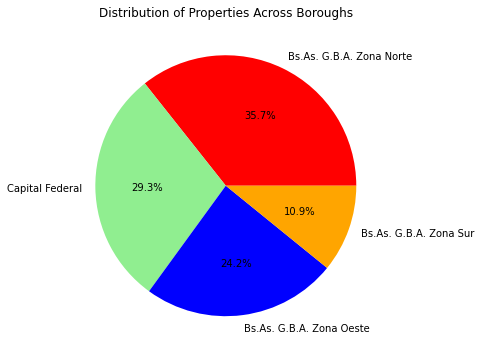

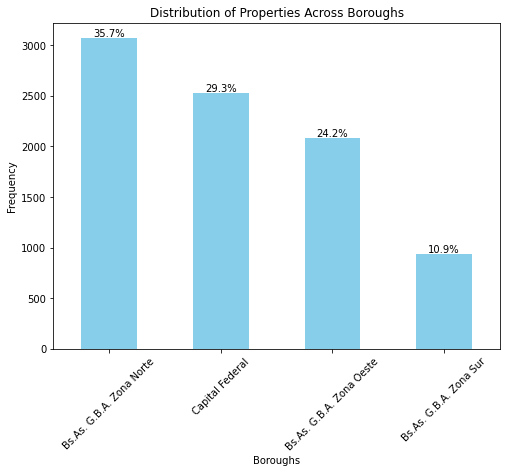

In [ ]:
# Calculate value counts for each borough
borough_counts = df['borough'].value_counts()
total_count = borough_counts.sum()

# Plotting pie chart
plt.figure(figsize=(8, 6))
plt.pie(borough_counts, labels=borough_counts.index, autopct='%1.1f%%', colors=['red', 'lightgreen', 'blue', 'orange'])
plt.title('Distribution of Properties Across Boroughs')
plt.show()

# Plotting histogram (bar chart)
plt.figure(figsize=(8, 6))
ax = borough_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Properties Across Boroughs')
plt.xlabel('Boroughs')
plt.ylabel('Frequency')
plt.xticks(rotation=45)

# Add percentage annotations on bars
for i in ax.patches:
    percentage = f'{(i.get_height() / total_count) * 100:.1f}%'
    ax.text(i.get_x() + i.get_width() / 2., i.get_height() + 0.5, percentage, ha='center', va='bottom')

plt.show()


### Understanding "Capital Federal" in the Context of Buenos Aires
"Capital Federal" specifically refers to the Federal Capital of Argentina, which is the city of Buenos Aires. This area comprises 29.3% of the province in the dataset.

Buenos Aires is not only the largest city in Argentina but also serves as the capital city of the country.

The term "Capital Federal" is commonly used to distinguish the city of Buenos Aires from the surrounding Buenos Aires Province. While the city of Buenos Aires is an autonomous city and not part of Buenos Aires Province, it is considered a separate administrative entity. Other areas in the Buenos Aires Province include 'Bs.As. G.B.A. Zona Oeste', 'Bs.As. G.B.A. Zona Norte', and 'Bs.As. G.B.A. Zona Sur'.

As the capital city, Buenos Aires plays a central role in Argentina's political, economic, and cultural life. It is a vibrant metropolis known for its rich history, diverse culture, and lively atmosphere.

### Focus on Capital Federal
Focusing on "Capital Federal" for our analysis offers several advantages:

 1. **Economic Significance**: As the economic hub of Argentina, understanding the real estate market in Buenos Aires can provide valuable insights into broader economic trends.
 2. **High Data Density**: With a significant portion of the dataset representing Capital Federal, the area provides a rich source of data for more accurate and robust predictive modeling.
 3. **Market Dynamics**: The real estate market in Capital Federal is often more dynamic and varied compared to other regions, making it an interesting and challenging subject for predictive analytics.
 4. **Policy Implications**: Insights gained from this analysis can inform local government policies and strategies in urban planning, housing, and economic development.
 5. **Cultural and Historical Importance**: Buenos Aires, with its unique blend of European and Latin American cultures, offers a distinct market scenario, which can enrich the understanding and development of predictive models.

By concentrating on Capital Federal, we can leverage its significance and the density of available data to develop a more comprehensive and nuanced understanding of the apartment prices in this critical area.

# 3.0 Data cleaning, exploration and manipulation

In [ ]:
# Build your `wrangle` function
def wrangle(filepath):
 # Read CSV file
 df = pd.read_csv(filepath)

 # Subset data: Apartments in "Capital Federal", less than 400,000
 mask_ba = df["place_with_parent_names"].str.contains("Capital Federal")
 mask_apt = df["property_type"] == "apartment"
 mask_price = df["price_aprox_usd"] < 400_000

 df = df[mask_ba & mask_apt & mask_price]

 # Subset data: Remove outliers for "surface_covered_in_m2"
 low, high = df["surface_covered_in_m2"].quantile([0.1, 0.9])
 mask_area = df["surface_covered_in_m2"].between(low, high)

 df = df[mask_area]

 # Split "lat-lon" column- feature engineering
 df[["lat", "lon"]] = df["lat-lon"].str.split(",", expand=True).astype(float)
 df.drop(columns="lat-lon", inplace=True)

 # Create "neighborhood" feature from the "place_with_parent_names"
 # Get place name
 df["neighborhood"] = df["place_with_parent_names"].str.split("|", expand=True)[3]
 df.drop(columns="place_with_parent_names", inplace=True)


 # Drop features with high null count above 50%
 df.drop(columns=["surface_total_in_m2", "price_usd_per_m2", "floor", "expenses"], inplace=True)

 #
 df.drop(columns=["operation", "property_type", "currency", "properati_url"], inplace=True)

 # Drop Leaky features
 df.drop(columns=[
 'price',
 'price_aprox_local_currency',
 'price_per_m2',
 ],
 inplace=True)

 # Drop columns with multicollinearity
 df.drop(columns=["rooms"], inplace=True)


 return df

The above wrangle function is designed to preprocess the Buenos Aires data from a CSV file. It starts by reading the file into a DataFrame and then filters the data to include only apartments located in **"Capital Federal"** with prices under **$400,000**. Further filtering removes outliers in the **"surface_covered_in_m2"** column by retaining values within the 10th and 90th percentiles. The function also splits the **"lat-lon"** column into separate **"lat"** and **"lon"** columns, converting them to numeric types and dropping the original **"lat-lon"** column. It extracts the **"neighborhood"** feature from the **"place_with_parent_names"** column and then removes this column. Next, it drops columns with more than 50% missing values, as well as those with low or high cardinality, leaky features, and multicollinearity issues. The cleaned DataFrame is then returned, retaining its original name (**df**).

In [ ]:
df = wrangle("buenos-aires-real-estate-1.csv")
print(df.info())
df.head(10)

<class 'pandas.core.frame.DataFrame'>
Index: 1343 entries, 4 to 8604
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   price_aprox_usd        1343 non-null   float64
 1   surface_covered_in_m2  1343 non-null   float64
 2   lat                    1300 non-null   float64
 3   lon                    1300 non-null   float64
 4   neighborhood           1343 non-null   object 
dtypes: float64(4), object(1)
memory usage: 63.0+ KB
None


price_aprox_usd  surface_covered_in_m2        lat        lon  neighborhood
4          129000.0                   70.0 -34.584651 -58.454693     Chacarita
9           87000.0                   42.0 -34.638979 -58.500115    Villa Luro
29         118000.0                   54.0 -34.615847 -58.459957     Caballito
40          57000.0                   42.0 -34.625222 -58.382382  Constitución
41          90000.0                   50.0 -34.610610 -58.412511          Once
48         138000.0                   74.0 -34.603824 -58.427291       Almagro
58         114000.0                   32.0 -34.586103 -58.423963       Palermo
62          82000.0                   50.0 -34.626518 -58.472463        Flores
70         166000.0                   52.0 -34.562084 -58.456686      Belgrano
72         136500.0                   71.0 -34.648143 -58.524277       Liniers

## Handling Missing Values in Latitude and Longitude
In our dataset, we observed that the latitude and longitude columns contain missing values. The number of missing values in these columns is less than the total number of rows in the dataframe. Instead of dropping these rows, which could potentially affect the integrity of our analysis, we have two options to handle these missing values:

1. **Fill Missing Values with Mean Values**:
 - One approach is to fill the missing values with the mean of their respective columns. This method allows us to retain the full dataset while minimizing the impact of missing values on our analysis. Here is how we can implement this approach:

2. **Use SimpleImputer During Modelling**:
 - Alternatively, we can leave the missing values as they are and use the SimpleImputer from the scikit-learn library during the modeling phase to fill in the missing values. This approach ensures that the imputation is part of the model pipeline and can be easily adjusted or modified if necessary.

By filling in the missing values with their respective mean values, we ensure that our dataset remains intact, maintaining data integrity and providing a complete dataset for analysis. Alternatively, using SimpleImputer during modeling integrates the imputation process into the modeling pipeline, offering flexibility and ease of adjustment.

Implementing both methods demonstrates how we can handle missing values effectively, ensuring minimal impact on our analysis and model performance. This dual approach allows us to choose the best strategy based on our specific requirements and constraints.


Here is how we can implement filling missing values with mean values.

In [ ]:
# Calculate the mean of the lat column
mean_lat = df['lat'].mean()

# Fill the missing values of the lat column with its mean
df['lat'].fillna(mean_lat, inplace=True)

# Calculate the mean of the lon column
mean_lon = df['lon'].mean()

# Fill the missing values of the lon column with its mean
df['lon'].fillna(mean_lon, inplace=True)


In [ ]:
#recheck dataframe to ensure no more missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1343 entries, 4 to 8604
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   price_aprox_usd        1343 non-null   float64
 1   surface_covered_in_m2  1343 non-null   float64
 2   lat                    1343 non-null   float64
 3   lon                    1343 non-null   float64
 4   neighborhood           1343 non-null   object 
dtypes: float64(4), object(1)
memory usage: 63.0+ KB


We filled the missing values in the latitude and longitude columns with their respective mean values.
This approach ensures that we retain data integrity and geographic accuracy in our analysis.

Upon reviewing the dataframe information, we observed that all columns are now complete, and there are no more missing values. This ensures that our dataset is ready for further analysis.

In [ ]:
df.describe()

price_aprox_usd  surface_covered_in_m2          lat          lon
count      1343.000000            1343.000000  1343.000000  1343.000000
mean     135527.838719              55.076694   -34.598543   -58.436828
std       59575.630208              18.160427     0.025848     0.037501
min       27279.000000              31.000000   -34.685112   -58.541490
25%       92000.000000              40.000000   -34.617753   -58.463571
50%      120029.460000              50.000000   -34.600106   -58.436828
75%      160000.000000              68.500000   -34.579791   -58.409139
max      395000.000000             100.000000   -34.536108   -58.359953

The summary statistics presented here describe four key variables of interest for a dataset containing information about apartments: **price_aprox_usd**, **surface_covered_in_m2**, **lat**, and **lon**. The **count** indicates that there are 1,343 observations for each of these variables, ensuring a consistent dataset.

The **price_aprox_usd** variable, representing the approximate price of the apartments in US dollars, has an average value of approximately **$135,528**. The standard deviation of about **59,576** suggests a moderate spread around this mean. The prices range from a minimum of **27,279** to a maximum of **395,000**, indicating a broad spectrum of apartment prices within the dataset. The quartile values (25%, 50%, and 75%) reveal that 25% of the apartments are priced below **92,000**, 50% below **120,029**, and 75% below **160,000**.

For the **surface_covered_in_m2** variable, which denotes the covered area of the apartments in square meters, the average size is approximately 55.08 square meters. With a standard deviation of around 18.16, the data shows variability in apartment sizes. The smallest apartment has a covered area of 31 square meters, while the largest covers 100 square meters. The quartile values indicate that 25% of the apartments are smaller than 40 square meters, 50% are smaller than 50 square meters, and 75% are smaller than 68.5 square meters.

The **lat** and **lon** variables represent the latitude and longitude coordinates of the apartments, respectively. The average latitude is approximately -34.5985, and the average longitude is about -58.4368. These coordinates are consistent with the geographical area of "Capital Federal" in Buenos Aires, Argentina. The standard deviations for both coordinates are relatively small (0.0258 for latitude and 0.0375 for longitude), indicating that the apartments are clustered within a specific area. The range for latitude spans from -34.6851 to -34.5361, and for longitude, it spans from -58.5415 to -58.3600. The quartile values for both variables show a gradual distribution of the apartments within these geographic bounds.

Overall, these summary statistics provide a comprehensive overview of the central tendency, dispersion, and range of key variables in the dataset, offering insights into the prices, sizes, and locations of the apartments in "Capital Federal."

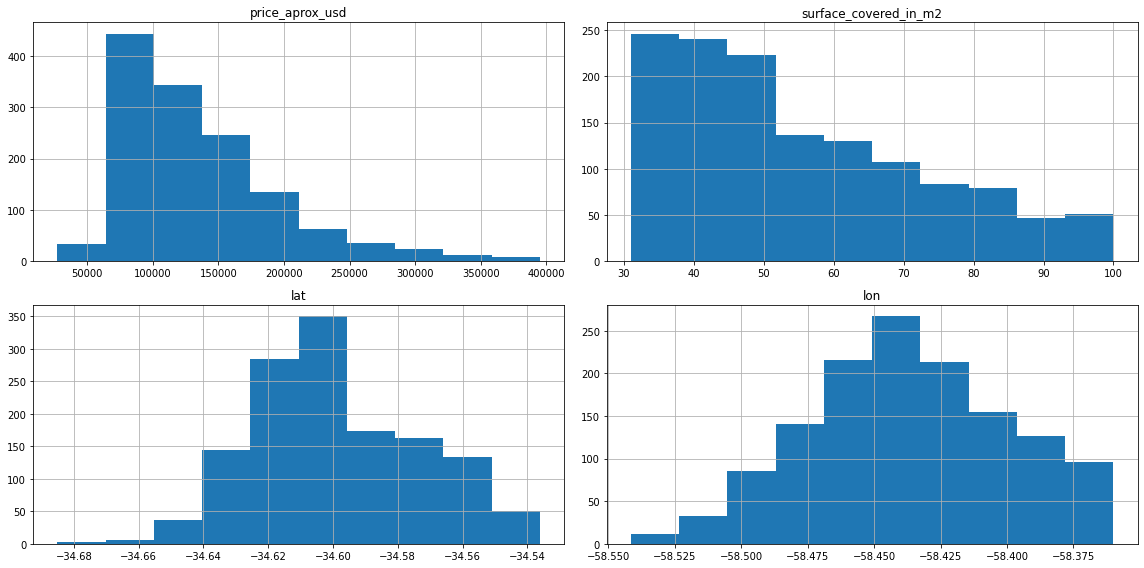

In [ ]:
# Visualizing our dataset to have an overview
df.hist(figsize=(16,8))
plt.tight_layout()

The provided plot contains four histograms, each representing the distribution of a different variable from the dataset. Here's an explanation of each histogram:

**price_aprox_usd:** The histogram displays the distribution of approximate apartment prices in USD. The distribution is right-skewed, with the majority of apartments priced below $150,000. There are fewer apartments in higher price ranges, indicating that lower-priced apartments are more common in the dataset.

**surface_covered_in_m2**: This histogram shows the distribution of the covered surface area of apartments in square meters. The distribution is also right-skewed, with most apartments having a covered area between 30 and 60 square meters. There are fewer apartments with larger covered areas, suggesting that smaller apartments are more prevalent in the dataset.

**lat**: This histogram represents the distribution of the latitude coordinates of the apartments. The distribution is somewhat symmetric, centered around -34.60 degrees latitude. This indicates that the apartments in the dataset are geographically concentrated around this latitude, which corresponds to the central area of Buenos Aires.

**lon:** This histogram illustrates the distribution of the longitude coordinates of the apartments. The distribution is roughly symmetric, centered around -58.45 degrees longitude. Similar to the latitude histogram, this suggests that the apartments are clustered around this central longitude, indicating a focus on the central regions of Buenos Aires.

**Overall Summary**
These histograms provide insights into the distribution of key variables in the dataset. The price and surface area distributions are right-skewed, indicating a prevalence of lower-priced and smaller apartments. The latitude and longitude distributions show a geographic concentration of apartments around the central areas of Buenos Aires. These visualizations help in understanding the characteristics of the dataset and can guide further analysis and modeling efforts. A more detailed explanation on the visualizations are explained immensely in the **Exploratory Data Analysis**.


# 4.0 Feature Engineering

Feature engineering is a critical step in preparing data for machine learning models. It involves transforming raw data into meaningful features that improve the performance and accuracy of predictive models. This process includes creating new features, modifying existing ones, and encoding categorical variables to provide the model with relevant information.

## Categorizing Housing Prices
To simplify our analysis and gain clearer insights into the real estate market, we will categorize house prices into different groups. This categorization helps us understand the range of prices and allows us to see which properties fall into various affordability categories.

Imagine you're shopping for a house and want to know if the prices you're seeing fit within your budget. By categorizing prices into groups like 'Poor', 'Moderate', 'Comfortable', and 'Rich', we can quickly identify which houses are affordable and which might be too expensive. This categorization makes it easier to compare different houses and make informed decisions, much like organizing items in a store into different sections for easy navigation.

## Implementing Price Categorization
We will add a new column to our DataFrame to categorize different house prices. Here's how we can do it:

1. **Define Price Ranges**:
- We will determine specific thresholds for each price category.
- Example categories:
 - **'Poor'**: Prices up to  100,000
 - **'Moderate'**: Prices between 100,000 and 200,000
 - **'Comfortable'**: Prices between  200,000 and 300,000
 - **'Rich'**: Prices between: 300,000 and 400,000

2. **Create the Price_Categories Feature**:

- We will use the pd.cut function to assign each house price to one of these categories.

In [ ]:
#Let's add a new column to categorise the different prices
price_ranges = [0,100_000,200_000,300_000,400_000]
price_labels = ['Poor', 'Moderate', 'Comfortable', 'Rich']
df['Price_Categories'] = pd.cut(df['price_aprox_usd'], price_ranges, labels=price_labels)

In [ ]:
df.head()

price_aprox_usd  surface_covered_in_m2        lat        lon  \
4          129000.0                   70.0 -34.584651 -58.454693   
9           87000.0                   42.0 -34.638979 -58.500115   
29         118000.0                   54.0 -34.615847 -58.459957   
40          57000.0                   42.0 -34.625222 -58.382382   
41          90000.0                   50.0 -34.610610 -58.412511   

    neighborhood Price_Categories  
4      Chacarita         Moderate  
9     Villa Luro             Poor  
29     Caballito         Moderate  
40  Constitución             Poor  
41          Once             Poor

We also want to categorize house prices numerically for correlation analysis and to facilitate the use of models that do not accept categorical variables for analysis and performance evaluation. By converting house prices categories into numerical categories, we can better understand their relationship with other features and ensure compatibility with a wider range of machine learning algorithms.

In [ ]:
#Let add another column to attribute a numeric value to the categories
price_ranges = [0,100_000,200_000,300_000,400_000]
price_labels_num = [1, 2, 3, 4]
df['Price_Categories_num'] = pd.cut(df['price_aprox_usd'], price_ranges, labels=price_labels_num)

In [ ]:
df.head()

price_aprox_usd  surface_covered_in_m2        lat        lon  \
4          129000.0                   70.0 -34.584651 -58.454693   
9           87000.0                   42.0 -34.638979 -58.500115   
29         118000.0                   54.0 -34.615847 -58.459957   
40          57000.0                   42.0 -34.625222 -58.382382   
41          90000.0                   50.0 -34.610610 -58.412511   

    neighborhood Price_Categories Price_Categories_num  
4      Chacarita         Moderate                    2  
9     Villa Luro             Poor                    1  
29     Caballito         Moderate                    2  
40  Constitución             Poor                    1  
41          Once             Poor                    1

In [ ]:
# Check for the unique observation of the new columns
print(df['Price_Categories'].unique())
print(df['Price_Categories_num'].unique())

['Moderate', 'Poor', 'Comfortable', 'Rich']
Categories (4, object): ['Poor' < 'Moderate' < 'Comfortable' < 'Rich']
[2, 1, 3, 4]
Categories (4, int64): [1 < 2 < 3 < 4]


# 5.0 Exploratory Data Analysis
## 5.1 Univariate Analysis
### 5.1.1 Variable- Price Distribution

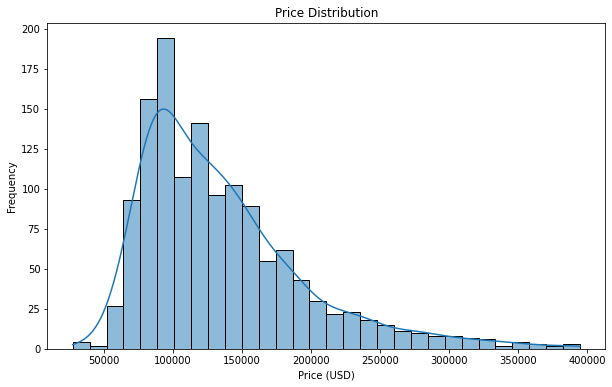

In [ ]:
#Variable- Price Distribution with Histogram
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='price_aprox_usd', bins=30, kde=True)
plt.title('Price Distribution')
plt.xlabel('Price (USD)')
plt.ylabel('Frequency')
plt.show()

The bar chart represents the distribution of property prices in the dataset. The x-axis depicts house values in USD, which vary from 0 to 400,000, and the y-axis reflects the frequency or number of dwellings in each price category.

The figure demonstrates a concentration of house prices between 50,000 and 150,000, indicating the range where most house prices are. The tallest bars fall within this range, culminating at roughly 100,000. This shows that 100,000 is the most prevalent price point in the dataset, based on the distribution pattern.
The distribution has a larger tail on the right, indicating fewer residences with higher prices. The right skewness indicates that, while many residences are priced lower, there are still those with significantly higher values, up to 400,000.

A smooth curve overlaid on the bars depicts the overall structure of the distribution, emphasizing the peak at 100,000 and the subsequent drop in frequency as prices rise. The tail of the distribution flattens and stretches further out, demonstrating the presence of higher-cost residences, although much less prevalent than those priced between 50,000 and 150,000.

Overall, the bar chart clearly shows that the dataset includes a significant concentration of housing values in the lower to mid-range, with only a few outliers at the top. The skewness and shape of the curve emphasize the asymmetry and presence of higher-priced outliers in the data.



In [ ]:
df['price_aprox_usd'].describe()

count      1343.000000
mean     135527.838719
std       59575.630208
min       27279.000000
25%       92000.000000
50%      120029.460000
75%      160000.000000
max      395000.000000
Name: price_aprox_usd, dtype: float64

We could see that the mean of house price is **135,527** which is higher than the median of **120,029** hence the reason for the right skewness. There is also a moderate variability in property prices around the mean. This is as a result of the wide range between the minimum and the maximum price

In [ ]:
df['price_aprox_usd'].info()

<class 'pandas.core.series.Series'>
Index: 1343 entries, 4 to 8604
Series name: price_aprox_usd
Non-Null Count  Dtype  
--------------  -----  
1343 non-null   float64
dtypes: float64(1)
memory usage: 21.0 KB


Non-Null Count: There are 1343 non-null values in the Series, indicating that there are no missing values.
Data Type (Dtype): The values in the Series are of type float64, which means they are floating-point numbers.
Overall, this Series contains 1343 house prices in USD and is stored as a pandas Series obje.y.







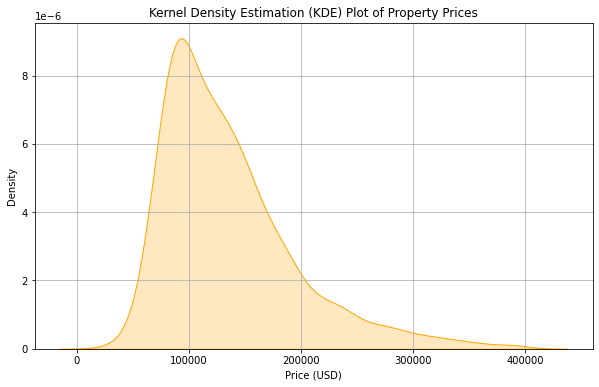

In [ ]:
#Variable- Price Distribution with kdeplot
plt.figure(figsize=(10, 6))
sns.kdeplot(df['price_aprox_usd'], shade=True, color='orange')
plt.title('Kernel Density Estimation (KDE) Plot of Property Prices')
plt.xlabel('Price (USD)')
plt.ylabel('Density')
plt.grid(True)
plt.show()


The KDE plot demonstrates a single peak at USD100,000 indicating this is the most prevalent price point. The curve climbs quickly from the left, peaks at about USD100,000 and then gradually decreases to the right, indicating a higher concentration of property values around the peak and fewer houses as prices rise.

The right tail of the distribution is extended, indicating that some houses are substantially more expensive, ranging up to USD400,000. This suggests a right-skewed distribution, with most houses having lower prices and a smaller number having significantly higher prices. The KDE plot smoothed out the variances in a histogram, giving a clearer picture of the overall distribution pattern and emphasizing the skewness of the data.

Overall, the KDE plot clearly illustrates that most property values are clustered around USD100,000, with a tapering off towards higher prices, showing that the dataset contains higher-priced outliers. This visualisation supplements the previous histogram by providing a more precise perspective on the distribution of housing prices.


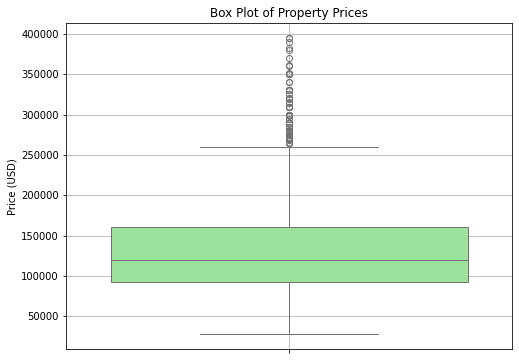

In [ ]:
#Variable- Price Distribution with Boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(y='price_aprox_usd', data=df, color='lightgreen')
plt.title('Box Plot of Property Prices')
plt.ylabel('Price (USD)')
plt.grid(True)
plt.show()


The box plot summarizes the dispersion of property prices. The central box depicts the interquartile range (IQR), with the bottom and top margins representing the 25th and 75th percentiles, respectively. The line inside the box represents the median price. The whiskers extend 1.5 times the IQR from the box's edges, with any points outside of this range deemed outliers.

The box plot indicates that the median home price is approximately 125,000 USD. The IQR is  wide, showing significant variation in property prices. There are numerous outliers on the higher end, indicating the presence of exceptionally expensive houses that differ greatly from the median.


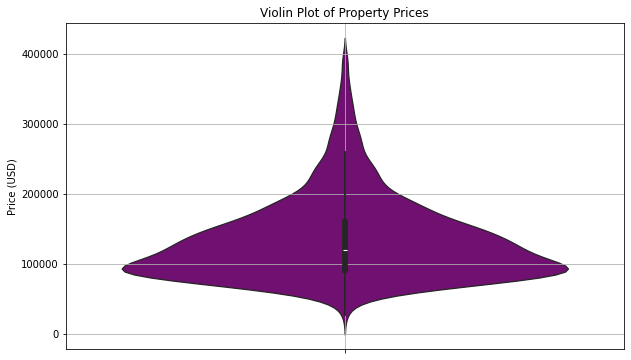

In [ ]:
#Variable- Price Distribution with Violinplot
plt.figure(figsize=(10, 6))
sns.violinplot(y='price_aprox_usd', data=df, color='purple')
plt.title('Violin Plot of Property Prices')
plt.ylabel('Price (USD)')
plt.grid(True)
plt.show()


The violin plot combines elements of a box plot and a kernel density plot to provide a more complete picture of the data distribution. The breadth of the plot at different price levels corresponds to the density of data points at those levels. The plot is symmetrical, with a centre line denoting the median and a box representing the interquartile range.
The violin plot shows a bimodal distribution with two peaks, indicating two separate groupings of property prices in the dataset. The lower peak is roughly USD 100,000, and the greater peak is just around 150,000 USD. This suggests that most houses are centred around these two price points. The density decreases dramatically over 250,000 USD, indicating fewer high-priced houses.


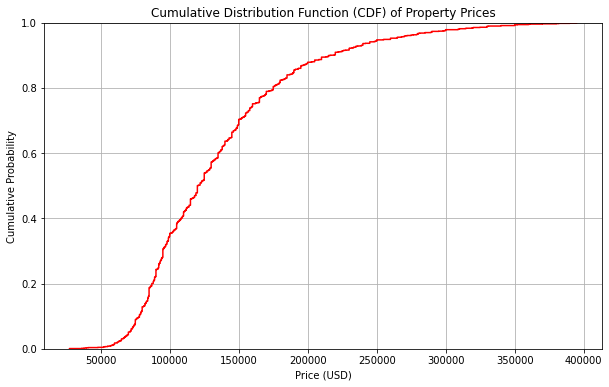

In [ ]:
#Variable- Price Distribution with CDF plot
plt.figure(figsize=(10, 6))
sns.ecdfplot(data=df['price_aprox_usd'], color='red')
plt.title('Cumulative Distribution Function (CDF) of Property Prices')
plt.xlabel('Price (USD)')
plt.ylabel('Cumulative Probability')
plt.grid(True)
plt.show()


The CDF plot displays the cumulative likelihood of property prices. It represents the likelihood that a property's price is less than or equal to a specific figure. The x-axis represents property prices, while the y-axis depicts cumulative likelihood.

The CDF plot illustrates that around 80% of the properties are priced below 200,000 USD

 The curve initially climbs sharply, indicating a large density of properties at lower values. As prices rise, the curve flattens, indicating fewer high-priced houses. The graphic depicts the distribution, demonstrating that the vast majority of homes are priced in the low to mid-range.


### 5.1.2 Variable- Price Categories

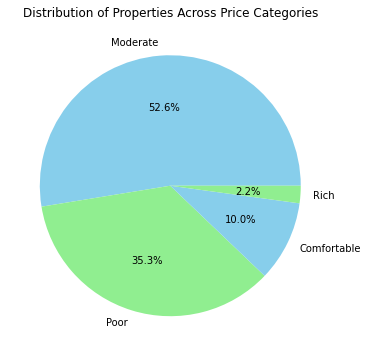

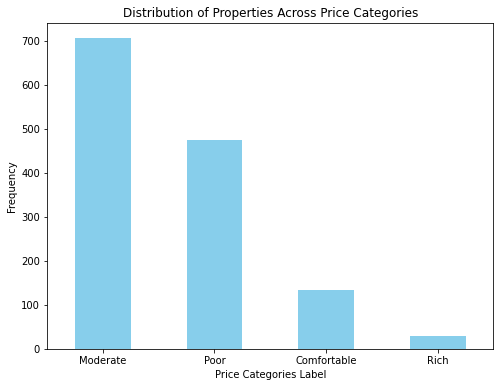

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate value counts for each property type
property_type_counts = df['Price_Categories'].value_counts()

# Plotting pie chart
plt.figure(figsize=(8, 6))
plt.pie(property_type_counts, labels=property_type_counts.index, autopct='%1.1f%%', colors=['skyblue', 'lightgreen'])
plt.title('Distribution of Properties Across Price Categories')
plt.show()

# Plotting histogram (bar chart)
plt.figure(figsize=(8, 6))
property_type_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Properties Across Price Categories')
plt.xlabel('Price Categories Label')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()


- **Price Range Distribution**: The majority of houses fall within the **moderate** price category, representing **52.6%** of the dataset. This aligns with the observation that the majority of houses fall within the price range of **80,000 to 150,000 USD**. Additionally, the **poor** category represents **35.3%** of the dataset, indicating that a significant portion of houses are priced below **80,000 USD**. The **comfortable** category, representing **10%** of the dataset, captures houses priced between **200,000 to 300,000 USD**, while the **rich** category, representing **2.2%** of the dataset, includes houses priced between **300,000 to 400,000 USD**.


- **Correlation**: The percentage breakdown of house prices into categories provides a clearer understanding of the distribution of prices and their affordability categories. The observation that the majority of houses fall within the **moderate** and **poor** categories correlates with the earlier observation that there are more houses with lower prices compared to higher prices. The right-skewed distribution indicates that while there are some houses with relatively high prices, the majority of houses are clustered towards the lower end of the price spectrum. This aligns with the higher percentages observed in the **poor** and **moderate** categories compared to the "comfortable" and "rich" categories.

In summary, the percentage analysis of price categories reinforces the earlier observation of the distribution of house prices, providing insights into the affordability levels of houses within the dataset.

### 5.1.3 Variable- Surface Area Distribution

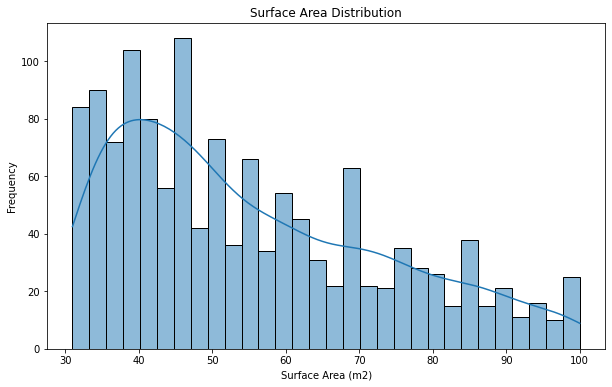

In [ ]:
#Variable- Surface Area Distribution with Histogram
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='surface_covered_in_m2', bins=30, kde=True)
plt.title('Surface Area Distribution')
plt.xlabel('Surface Area (m2)')
plt.ylabel('Frequency')
plt.show()

The histogram, layered with a line graph, depicts the distribution of property surface areas in square meters. The histogram's bars depict the frequency of properties across various surface area sizes, whilst the line graph provides a distribution curve fitted to the data.

Analysis of the Distribution:
 - Most properties have a surface area of 50-60 square meters, as shown by the tallest bars.
   
 - The distribution is right-skewed, with a tail of larger properties extending to the right of the graph.

 - The distribution curve's apex corresponds to the histogram's highest bar, indicating that the average property size is in the mid-50s square meters. Surface areas larger than 80 square meters are less common, as the height of the bars and the curvature decrease

In [ ]:
df['surface_covered_in_m2'].describe()

count    1343.000000
mean       55.076694
std        18.160427
min        31.000000
25%        40.000000
50%        50.000000
75%        68.500000
max       100.000000
Name: surface_covered_in_m2, dtype: float64

In [ ]:
df['surface_covered_in_m2'].info()

<class 'pandas.core.series.Series'>
Index: 1343 entries, 4 to 8604
Series name: surface_covered_in_m2
Non-Null Count  Dtype  
--------------  -----  
1343 non-null   float64
dtypes: float64(1)
memory usage: 21.0 KB


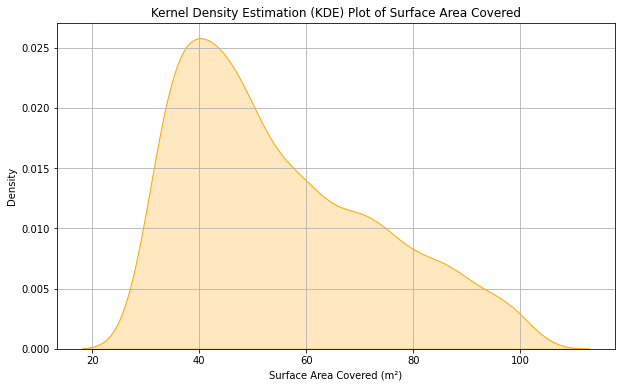

In [ ]:
#Variable- Surface Area Distribution with kdeplot
plt.figure(figsize=(10, 6))
sns.kdeplot(df['surface_covered_in_m2'], shade=True, color='orange')
plt.title('Kernel Density Estimation (KDE) Plot of Surface Area Covered')
plt.xlabel('Surface Area Covered (m²)')
plt.ylabel('Density')
plt.grid(True)
plt.show()


The KDE plot shows a smooth curve representing the density distribution of property sizes across the dataset.
Interpretation of the KDE plot:
- Peak of distribution: The curve peaks at approximately 40 square meters, indicating that this is the most common property size in the sample.

- The curve is slightly right skewed, showing that while most properties are around the peak size, there are a considerable number of larger properties stretching up to 100 square meters or more.
- Density values on the y-axis indicate the chance of data points occurring inside specific surface area intervals. The highest point on the y-axis corresponds to the peak at 40 square meters, indicating the most likely size.


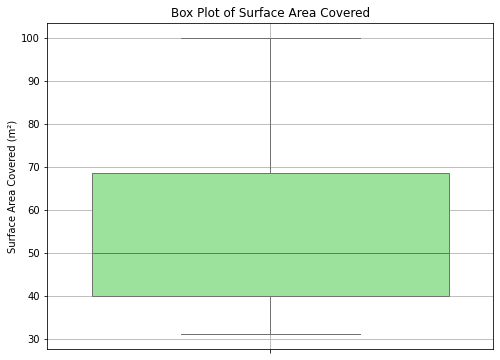

In [ ]:
#Variable- Surface Area Distribution with Boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(y='surface_covered_in_m2', data=df, color='lightgreen')
plt.title('Box Plot of Surface Area Covered')
plt.ylabel('Surface Area Covered (m²)')
plt.grid(True)
plt.show()


The box plot illustrates the distribution of surface areas of properties in square meters. It includes major statistical measures such as the median, quartiles, and range, with no identified outliers.
- Interquartile Range (IQR): The central box represents the range between the first and third quartiles, encompassing the middle 50% of the data and providing a glimpse of average property sizes.

- The median is closer to the first quartile, indicating a bias towards smaller property sizes.

- Box plot whiskers extend from quartiles to maximum and minimum values within 1.5 times the IQR of Q1 and Q3, respectively. This displays the entire range of common property sizes without the influence of extreme values.

- No outliers: This plot shows that all property sizes are within a usual range, with no extreme variances.


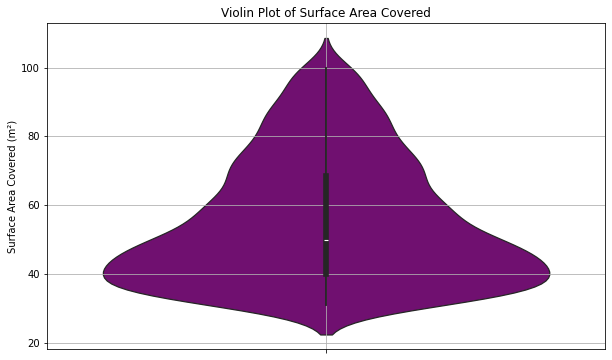

In [ ]:
#Variable- Surface Area Distribution with Violinplot
plt.figure(figsize=(10, 6))
sns.violinplot(y='surface_covered_in_m2', data=df, color='purple')
plt.title('Violin Plot of Surface Area Covered')
plt.ylabel('Surface Area Covered (m²)')
plt.grid(True)
plt.show()


The violin plot combines parts of a box plot and a kernel density plot to give a complete picture of the data distribution.

Key Features of the Violin Plot:
- Overall Shape: The "violin" shape depicts data density at various values, with thicker parts suggesting a higher concentration of points. In this plot, the broadest regions of the violin appear in the middle of the data range, indicating a concentration of property sizes in this area.

- Violin plots, like box plots, show the median and interquartile range (IQR). A white dot represents the median, which is the data distribution's midpoint. The thick black bar within the violin represents the IQR, which visually depicts the middle 50% of the data.

- Symmetry and Distribution: The plot's symmetry around the median indicates a balanced distribution of data on both sides. However, the tails at both ends of the violin indicate a wide variation in the smallest and greatest property sizes, but less common than sizes closer to the middle.


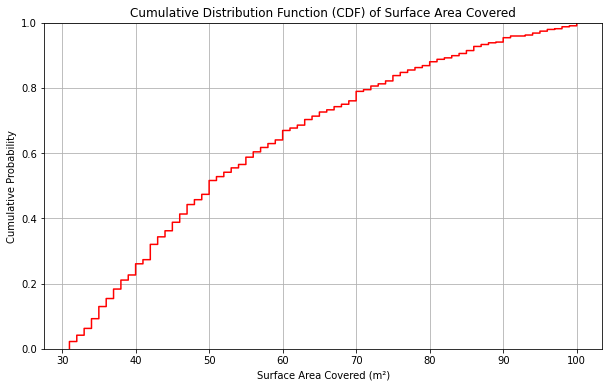

In [ ]:
#Variable- Surface Area Distribution with CDFplot
plt.figure(figsize=(10, 6))
sns.ecdfplot(data=df['surface_covered_in_m2'], color='red')
plt.title('Cumulative Distribution Function (CDF) of Surface Area Covered')
plt.xlabel('Surface Area Covered (m²)')
plt.ylabel('Cumulative Probability')
plt.grid(True)
plt.show()


The CDF is a statistical tool that shows the cumulative probability associated with a variable, in this case, the surface area of properties.
Key Features of the CDF Plot:

 - X-Axis (Surface Area): This axis represents the surface area of properties, ranging from 30 to 100 square meters. Each point on the x-axis corresponds to a specific property size.
 -	Y-Axis (Cumulative Probability): The y-axis indicates the cumulative probability, which ranges from 0 to 1 (or 0% to 100%). Each value on this axis represents the percentage of properties that have a surface area less than or equal to the corresponding value on the x-axis.
 -	Shape of the Curve: The curve starts at the lower end of the surface area spectrum and increases steadily as the surface area increases. This smooth and continuous rise suggests a gradual accumulation of properties across a range of sizes.
Analysis of the Distribution:
 -	Lower Range: At around 30 square meters, the CDF begins near zero, indicating very few properties at this size.
 -	Mid-Range: As the surface area increases to around 50-70 square meters, the slope of the curve becomes steeper, suggesting a higher concentration of properties within this range. This part of the curve accumulates the most probability density, indicating that a significant portion of the properties falls into this size bracket.
 -	Upper Range: Beyond 70 square meters, the curve's slope begins to level off, indicating that larger properties (greater than 70 square meters) are less common. The curve approaches a cumulative probability of 1 (100%), showing that nearly all properties in the dataset are accounted for by the time it reaches 100 square meters.

### 5.1.4 Variable- Latitude Distribution

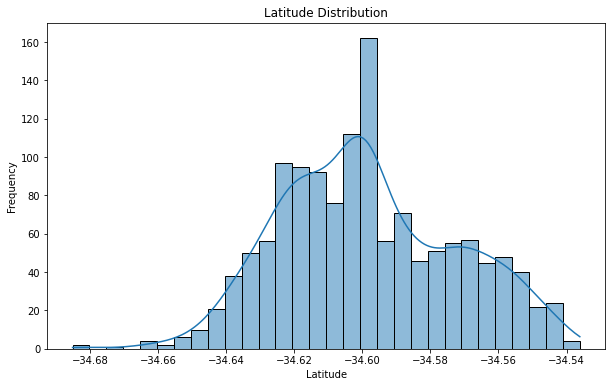

In [ ]:
#Variable- Latitude Distribution with Histogram
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='lat', bins=30, kde=True)
plt.title('Latitude Distribution')
plt.xlabel('Latitude')
plt.ylabel('Frequency')
plt.show()

The histogram and overlaid kernel density plot represent the distribution of latitude focusing on a narrow range of latitude values, approximately between -34.68 and -34.54 degrees.

Key Features of the Visualization
:
* Histogram Bars: These bars show the frequency of data points within specific intervals of latitude. The highest bar occurs around -34.60 degrees, indicating that this latitude has the highest concentration of data points in the dataset.
* Kernel Density Estimation (KDE): The smooth line overlaid on the histogram provides a continuous probability density curve of the latitude data. It highlights the general shape and spread of the distribution, which in this case shows a clear peak around -34.60 degrees. This peak suggests that a significant portion of the data is clustered around this latitude.
* Distribution Characteristics: The distribution appears to be approximately normal but shows some asymmetry or skewness, as indicated by smaller peaks to the left and right of the main peak. This could suggest multiple modes within the dataset, perhaps indicating different clusters of locations at slightly varying latitudes.


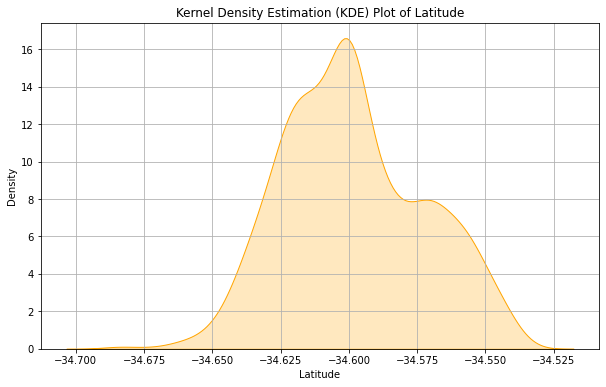

In [ ]:
#Variable- Latitude Distribution with Kdeplot
plt.figure(figsize=(10, 6))
sns.kdeplot(df['lat'], shade=True, color='orange')
plt.title('Kernel Density Estimation (KDE) Plot of Latitude')
plt.xlabel('Latitude')
plt.ylabel('Density')
plt.grid(True)
plt.show()


The KDE plot provides a smoothed continuous line that helps identify the density and structure of the data across different latitude points.
Key Features of the KDE Plot:
-  Latitude Range: The plot spans a narrow range of latitudes, from approximately -34.700 to -34.525 degrees. This precision in the range suggests a focus on a specific geographic region.
-  Density Peaks: The plot shows two major peaks, indicating the two latitudes where data points are most densely concentrated. The taller peak around -34.600 degrees is the primary mode, indicating the highest concentration of data points. There's a secondary, smaller peak around -34.575 degrees.     Shape and Spread: The shape of the KDE curve is bimodal, suggesting that there are two main groups or clusters of data points within this range of latitudes. The spread between the peaks and the gradual decrease in density on either side of the peaks illustrate the distribution and spread of the data points.




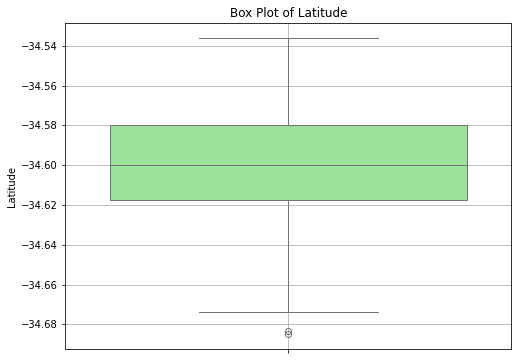

In [ ]:
#Variable- Latitude Distribution with Boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(y='lat', data=df, color='lightgreen')
plt.title('Box Plot of Latitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.show()


Key Features of the Box Plot:
	Central Box: Represents the interquartile range (IQR), which encompasses the middle 50% of the data. The bottom of the box (the lower quartile, Q1) and the top of the box (the upper quartile, Q3) provide insights into the range within which the central half of the data lies. In this plot, the IQR spans from approximately -34.64 to -34.60 degrees latitude.

*	Median: Indicated by a line within the box, the median (-34.62 degrees) splits the middle 50% of the data into two halves. This central value is key to understanding the typical latitude observed in the dataset.

*	Whiskers: Extend from the quartiles to the maximum and minimum values within 1.5 times the IQR from the quartiles. The upper whisker extends up to about -34.56 degrees, and the lower whisker goes down to approximately -34.68 degrees. These whiskers provide a visual representation of the range of the data.

*	Outliers: A single outlier is marked below the lower whisker, suggesting an unusual value that does not fit within the typical spread of the data. This outlier is around -34.70 degrees.

Interpretation and Insights:

*	Distribution: The distribution of latitudes is relatively tight, as indicated by the narrow IQR, with a central clustering around the median. This suggests little variability in the latitude of the observations within the central 50% of the data.

*	Outlier Detection: The presence of an outlier suggests that there is at least one observation that is significantly different from the rest, which might be of particular interest depending on the context (e.g., a geographic location significantly further south than the rest).

*	Symmetry and Skewness: The relatively symmetric appearance of the box and whiskers around the median indicates a symmetric distribution of data around the central latitude, with slight skewness due to the outlier.
  


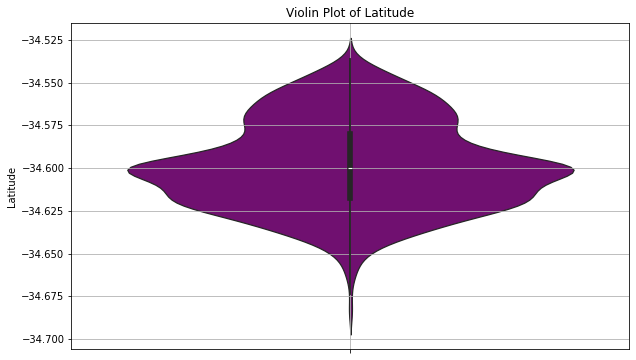

In [ ]:
#Variable- Latitude Distribution with Violinplot
plt.figure(figsize=(10, 6))
sns.violinplot(y='lat', data=df, color='purple')
plt.title('Violin Plot of Latitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.show()


Key Features of the Violin Plot:

-	Shape and Symmetry: The plot displays a somewhat symmetrical shape centred around the median, which is represented by the white dot in the middle of the plot. The symmetrical nature indicates a balanced distribution of latitude values around the median.

-	Multiple Peaks: There are evident peaks in the density at various points along the latitude range, suggesting the presence of multiple modes within the data. This indicates clusters of data points at specific latitudes, which could correspond to geographical or regional groupings.

-	Width of the Plot: The width of the violin at different points illustrates the density of data points at those latitudes. The wider parts of the violin indicate a higher concentration of data points, suggesting that more observations are recorded at these latitudes.

-	Tails: The tails of the violin that taper off toward the upper and lower ends of the plot indicate the presence of fewer observations at these latitudes, showing how the frequency of data points decreases as the latitude moves away from the central values.


Detailed Analysis:

-	Central Tendency: The central region of the violin around the median shows a high concentration of data points, indicating that a significant proportion of the observations cluster around this latitude. This could suggest a geographic or demographic focal point for the data collected.

-	Variability and Distribution: The distribution is not entirely uniform or normal, as evidenced by the multiple peaks and varying widths across the latitude range. This variability could be significant for studies looking at spatial distribution or geographic diversity within the dataset.



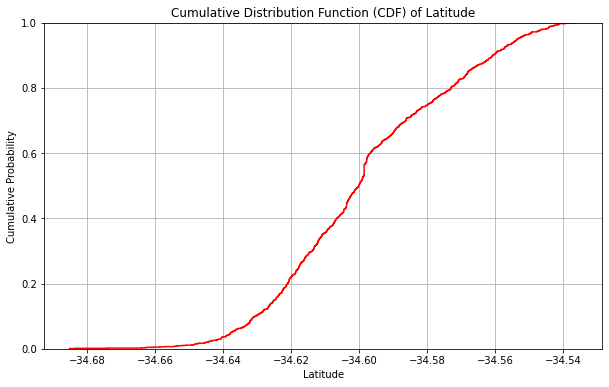

In [ ]:
#Variable- Latitude Distribution with CDFplot
plt.figure(figsize=(10, 6))
sns.ecdfplot(data=df['lat'], color='red')
plt.title('Cumulative Distribution Function (CDF) of Latitude')
plt.xlabel('Latitude')
plt.ylabel('Cumulative Probability')
plt.grid(True)
plt.show()


The CDF provides a cumulative probability of latitude values, allowing us to see the proportion of data points that fall below each latitude value.


-	X-Axis (Latitude): The x-axis displays the latitude values, which range from about -34.68 to -34.54 degrees. This range indicates the geographical scope covered by the data.

-	Y-Axis (Cumulative Probability): The y-axis measures cumulative probability, ranging from 0 to 1 (or 0% to 100%). This axis shows the percentage of total observations that fall at or below each latitude value shown on the x-axis.

-	Curve Shape: The curve starts at the lowest latitude value and increases smoothly as it moves to higher latitude values. The steeper parts of the curve indicate a higher concentration of data points at those latitudes

-	Initial Latitude Values: The curve begins at approximately -34.68 degrees. The steep ascent from this point indicates that a significant portion of data points are concentrated around the lower end of the latitude range.

-	Mid-Range Behaviour: As the curve approaches the middle of the latitude range, around -34.60 to -34.58 degrees, it rises less steeply, suggesting a more gradual increase in the density of data points.
-	Approaching Maximum Latitude: The curve becomes steeper again as it nears -34.56 degrees, indicating another concentration of data points near this latitude before it levels off towards the maximum latitude in the dataset.

-	End of Curve: The curve flattens out as it reaches the highest latitude values, culminating at 1.0 or 100% cumulative probability at about -34.54 degrees. This flattening indicates that all data points have been accounted for by this latitude.



### 5.1.5 Variable- Longitude Distribution

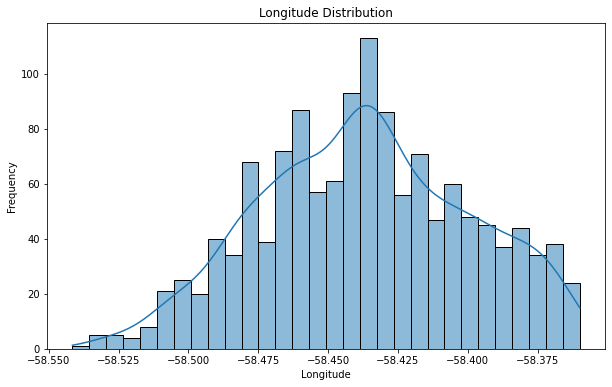

In [ ]:
#Variable- Longitude Distribution with Histogram
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='lon', bins=30, kde=True)
plt.title('Longitude Distribution')
plt.xlabel('Longitude')
plt.ylabel('Frequency')
plt.show()

This visualization is particularly useful for examining the frequency and distribution pattern of data across a specified range of longitude values.

Key Features of the Visualization

:-
-	Histogram: The histogram displays bars that represent the frequency of data within specific intervals of longitude. The highest bars are centred around -58.425 degrees, indicating that this is the most common range of longitude in the dataset.

-	Kernel Density Estimation (KDE): The KDE plot, represented by the smooth curve, provides a continuous probability density of the data at various longitude points. It helps in identifying the general shape of the distribution and highlights the density and spread of longitudes in a more nuanced manner than the histogram.

-	X-Axis (Longitude): The x-axis ranges approximately from -58.550 to -58.375 degrees, offering a detailed look at the distribution of longitude values within this range.

-	Y-Axis (Frequency): The y-axis quantifies the number of occurrences or frequency of data points within each histogram bin.

Detailed Analysis:

-	Central Concentration: The plot's peak at around -58.425 degrees suggests a significant concentration of data points around this longitude, possibly indicating a geographic or demographic centre of interest within the dataset.

-	Distribution Shape: The KDE line suggests a slightly skewed distribution, with a tail extending towards the higher longitudes. This skewness indicates that while most data are concentrated around the central longitude, there is a non-negligible spread towards the higher end of the range.

-	Implications for Geographic Analysis: This type of distribution could be indicative of certain geographic or environmental features that are more prevalent or intensively studied in these longitudes. For example, this could relate to urban areas, natural resources, or specific land uses that are concentrated around these longitudes.


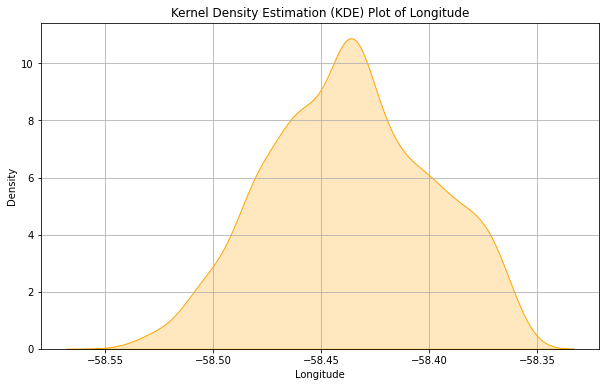

In [ ]:
plt.figure(figsize=(10, 6))
sns.kdeplot(df['lon'], shade=True, color='orange')
plt.title('Kernel Density Estimation (KDE) Plot of Longitude')
plt.xlabel('Longitude')
plt.ylabel('Density')
plt.grid(True)
plt.show()



Key Features of the KDE Plot:

-	Range of Longitudes: The x-axis spans a narrow range from approximately -58.55 to -58.35 degrees, allowing for a focused analysis of this specific segment of longitudes.

-	Peak of the Distribution: The plot shows a distinct peak at around -58.40 degrees. This peak represents the mode of the distribution, indicating the longitude with the highest density of data points.

-	Shape of the Distribution: The curve is bell-shaped, suggesting a normal distribution of longitude values around the central peak. This symmetry indicates that data points are equally likely to occur on either side of the mode, decreasing in likelihood as the distance from the mode increases.

-	Density on the Y-Axis: The y-axis measures the density of the data points. The height of the peak provides insight into the concentration of data points at the mode, with a maximum density reaching just above 10 on the scale.

Detailed
 Analysis:

-	Central Concentration: The concentration of data points around -58.40 degrees suggests a significant geographic or logistical focus at this longitude. This could be indicative of a central location of interest within the study area, such as a major city, a natural resource, or a key transportation hub.

-	Spread of Data: The gradual tapering off the curve towards both ends of the range indicates fewer occurrences of data points as the longitude moves away from the central peak. This distribution pattern could help in understanding the spread of certain phenomena or resources about geographic longitude.


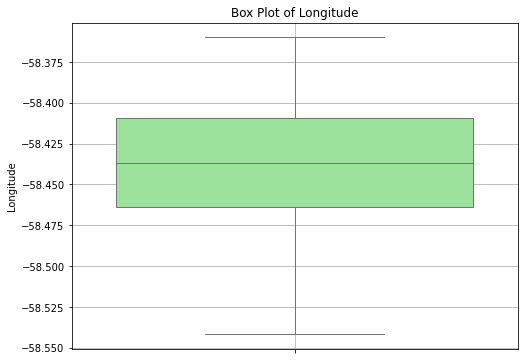

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(y='lon', data=df, color='lightgreen')
plt.title('Box Plot of Longitude')
plt.ylabel('Longitude')
plt.grid(True)
plt.show()


Key Features of the Box Plot:

-	Central Box: The central box represents the interquartile range (IQR), which contains the middle 50% of the data. The lower edge of the box (Q1) and the upper edge (Q3) show the range of typical longitude values. For this dataset, the box spans from approximately -58.45 to -58.425 degrees.

-	Median Line: The line within the box marks the median of the dataset, located around -58.435 degrees. This value represents the midpoint of the data, indicating that half of the longitude values are less than this value and half are greater.

-	Whiskers: The lines extending from the top and bottom of the box show the full range of the data, excluding outliers. The upper whisker reaches to about -58.40 degrees, and the lower whisker extends to approximately -58.475 degrees, indicating the range within which most longitude values fall.

-	Outliers: This box plot does not appear to show any outliers, as there are no data points plotted beyond the whiskers. This indicates that all data values are within a reasonable range of the quartiles.

Detailed Analysis:

-	Central Concentration: The narrow IQR suggests that the central 50% of longitude values are tightly grouped around the median, indicating low variability within the middle range of the data.

-	Distribution Symmetry: The relatively symmetrical appearance of the box and the almost equal length of the whiskers suggest that the data distribution is symmetric around the median. This symmetry indicates a balanced spread of longitude values above and below the median.

-	Range of Data: The total range covered by the data, from the end of the lower whisker to the top of the upper whisker, suggests that while there is some spread in longitude values, it is not extremely wide, focusing the dataset within a specific geographic area.


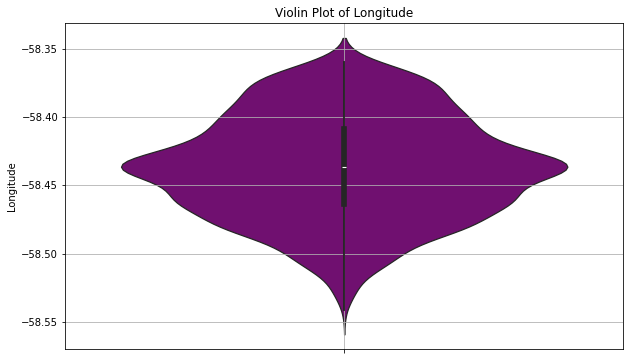

In [ ]:
plt.figure(figsize=(10, 6))
sns.violinplot(y='lon', data=df, color='purple')
plt.title('Violin Plot of Longitude')
plt.ylabel('Longitude')
plt.grid(True)
plt.show()


Key Features of the Violin Plot:

-	Central White Line: The white line in the centre of the violin represents the median of the data. This is the value that divides the dataset into two halves in terms of number of observations.

-	Shape of the Plot: The shape of the violin plot on either side of the median provides visual cues about the density of the data at different points. The width of the plot at any given level of longitude corresponds to the number of observations that fall near that value.

-	Distribution Symmetry: The plot appears symmetrical around the median, suggesting that the data is evenly distributed around the central value, with no significant skew towards higher or lower longitudes.

-	Range and Spread: The plot extends from approximately -58.55 to -58.35 in longitude, showing the range of data. The thickest part of the violin, indicating the highest density of data points, is around the median, which appears to be close to -58.45.

-	Tail Areas: The tails of the violin plot taper off near the maximum and minimum values of the longitude, indicating fewer observations in these areas. This tapered effect suggests that most of the data points are concentrated around the median, with less frequent observations near the extremes of the dataset.


Detailed Analysis:

-	Central Tendency: The median longitude shown in the plot indicates the central point of data concentration. For geographic or environmental analysis, this central value could represent an area of significant interest.

-	Data Density: The broadest part of the violin around the median suggests a high concentration of longitude values in this area, which might indicate a clustering of geographic features or activities at these longitudes.


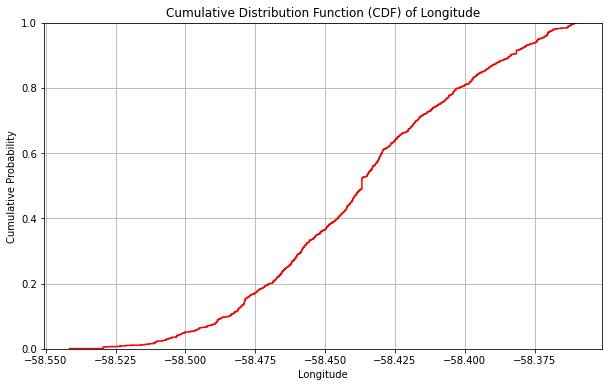

In [ ]:
plt.figure(figsize=(10, 6))
sns.ecdfplot(data=df['lon'], color='red')
plt.title('Cumulative Distribution Function (CDF) of Longitude')
plt.xlabel('Longitude')
plt.ylabel('Cumulative Probability')
plt.grid(True)
plt.show()


Key Features of the CDF Graph:

-	X-Axis (Longitude): The x-axis represents longitude values, ranging approximately from -58.550 to -58.375 degrees. This range gives a specific focus on how data points are distributed across these longitudes.
-	Y-Axis (Cumulative Probability): The y-axis indicates the cumulative probability, ranging from 0 to 1 (or 0% to 100%). Each point on the graph represents the proportion of data that falls at or below a given longitude.

-	Curve Shape: The curve starts near the lowest longitude value and increases smoothly and steadily as the longitude value increases. The slope of the curve gives insight into the density of data points at different longitudes.

Detailed Analysis:

-	Initial Slope: The beginning of the curve is relatively flat, suggesting that there are fewer data points in the lower longitude values (-58.550 to around -58.500).

-	Steeper Section: As the curve approaches -58.475 to -58.425, it becomes steeper, indicating a higher density of data points in this range. This suggests that many data points or observations are concentrated around these longitude values.

-	Levelling Off: Towards the higher end of the longitude range, the curve begins to level off, indicating that the increase in cumulative probability slows down as fewer new data points are added. This shows that while data continues to extend to higher longitude values, the density of new data points decreases.


### 5.1.6 Variable- Neigborhood Distribution

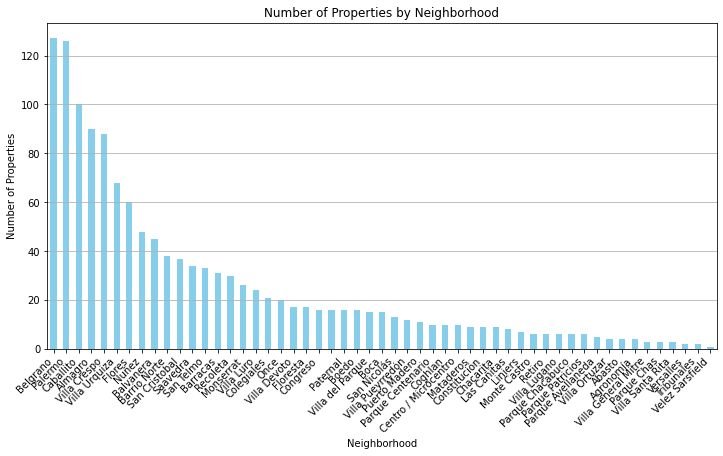

In [ ]:
plt.figure(figsize=(12, 6))
df['neighborhood'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Number of Properties by Neighborhood')
plt.xlabel('Neighborhood')
plt.ylabel('Number of Properties')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.show()


Key Features of the Bar Chart:

-	X-Axis (Neighbourhoods): The x-axis lists the names of neighbourhoods, indicating a wide variety of areas included in the dataset. The neighbourhoods are arranged in decreasing order of the number of properties they contain.

-	Y-Axis (Number of Properties): The y-axis quantifies the number of properties, showing a range that appears to start at 0 and peaks at over 120 properties for the most populated neighbourhood.

-	Bars: Each bar represents the number of properties in a specific neighbourhood. The tallest bar, indicating the neighbourhood with the most properties, is located at the leftmost part of the chart, with bars decreasing in height as the chart progresses to the right.


Detailed Analysis:

-	High Concentration in Specific Neighbourhoods: The chart shows that a few neighbourhoods have a significantly higher number of properties compared to others. The tallest bars are clustered towards the left side of the chart, suggesting that properties are heavily concentrated in a small number of neighbourhoods.

-	Variability Across Neighbourhoods: There is a notable variability in the number of properties per neighbourhood, as seen in the steep decline in bar heights from left to right. This indicates a wide disparity in property density across different areas.


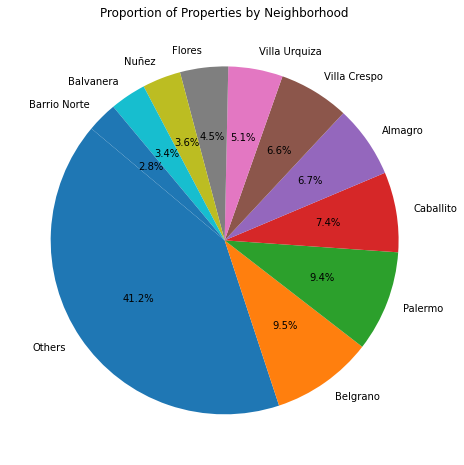

In [ ]:
# Set the number of top neighborhoods to display
top_n = 10

# Get the top N neighborhoods
top_neighborhoods = df['neighborhood'].value_counts().nlargest(top_n).index

# Group neighborhoods not in top N into 'Others' category
df['neighborhood_grouped'] = df['neighborhood'].where(df['neighborhood'].isin(top_neighborhoods), other='Others')

# Plot the pie chart
plt.figure(figsize=(10, 8))
df['neighborhood_grouped'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Proportion of Properties by Neighborhood')
plt.ylabel('')
plt.show()


Key Features of the Pie Chart:

-	Segmentation: Each segment of the pie chart corresponds to a different neighbourhood. The size of each segment reflects the proportion of properties in that neighbourhood relative to the total.

-	Percentage Labels: Each segment is labelled with the percentage of properties it contains, providing a clear and immediate understanding of each neighbourhood's share.

-	Colour Coding: Different colours are used for each segment to enhance readability and differentiation among neighbour

Detailed Analysis:

-	Concentration of Properties: The data shows a concentration of properties in a few key neighbourhoods such as Palermo, Caballito, and Belgrano, which are among the most significant individual segments. This could indicate higher population densities, more commercial activities, or greater real estate developments in these areas compared to others.

-	Diversity in Distribution: The large "Others" segment suggests a diverse distribution of properties across many neighbourhoods, highlighting that while some areas may serve as major hubs, there are numerous other smaller or less dense areas contributing to the urban landscape.
hoods.


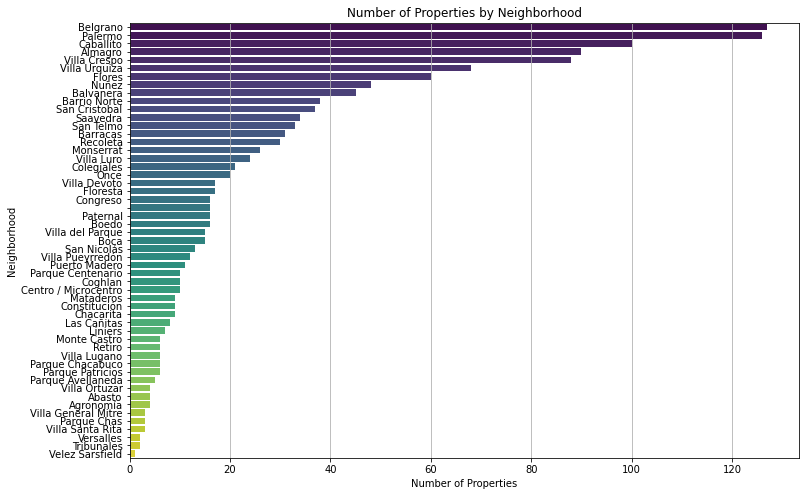

In [ ]:
plt.figure(figsize=(12, 8))
sns.countplot(y='neighborhood', data=df, order=df['neighborhood'].value_counts().index, palette='viridis')
plt.title('Number of Properties by Neighborhood')
plt.xlabel('Number of Properties')
plt.ylabel('Neighborhood')
plt.grid(axis='x')
plt.show()


"Number of Properties by Neighbourhood," presents the distribution of properties across various neighbourhoods in a descending order. Colour coding is visually used to separate different ranges of property numbers, making it easier to interpret data distribution briefly.

Key Features of the Bar Chart:

-	Bar Orientation and Length: Each horizontal bar represents a neighbourhood, with the length of the bar indicating the number of properties in that neighbourhood. The neighbourhoods are ordered from most to least properties, top to bottom.

-	Colour Coding: The bars are colour-coded, with darker shades typically indicating neighbourhoods with more properties and lighter shades representing fewer properties. This visual strategy helps in quickly distinguishing neighbourhoods with high, medium, and low property counts.

-	Neighbourhood Labels: Every bar is labelled with the name of the neighbourhood it represents, directly aligning with the respective bar to facilitate easy reading and interpretation.


-	Numerical Scale: The x-axis serves as a numerical scale indicating the count of properties, which helps quantify the differences in property distribution among neighbourhoods.

Detailed Analysis:

-	Property Concentration: The chart highlights significant variations in the number of properties among neighbourhoods. For example, neighbourhoods like Belgrano, Palermo, and Caballito have the highest number of properties, each surpassing approximately 100 properties, suggesting they are major residential or commercial hubs.

-	Gradient Distribution: There is a noticeable gradient in property distribution; a few neighbourhoods have very high numbers of properties, but the majority have moderately fewer, and many neighbourhoods have significantly fewer properties. This distribution suggests a concentration of development or attractiveness in specific areas.



## 5.2 Bivariate Analysis

### 5.2.1 Variable- Price vs Price Categories

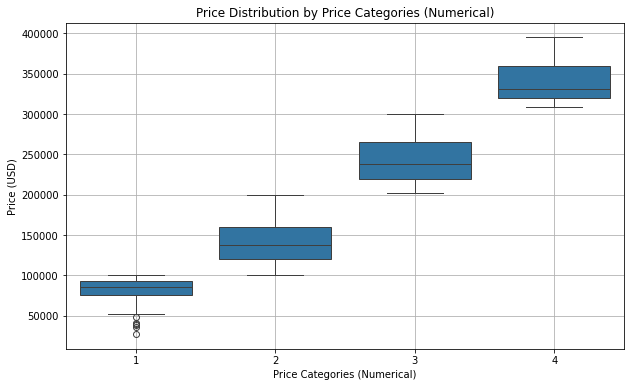

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Price_Categories_num', y='price_aprox_usd', data=df)
plt.title('Price Distribution by Price Categories (Numerical)')
plt.xlabel('Price Categories (Numerical)')
plt.ylabel('Price (USD)')
#plt.xticks(ticks=[0, 1], labels=['Poor', 'Moderate'])  # Assuming 1 corresponds to 'Poor' and 2 corresponds to 'Moderate'
plt.grid(True)
plt.show()


The box plot above provides a clear visualization of property prices distributed across four distinct numerical price categories. Box plots are excellent for assessing the range, central values, and variability of prices within each category and for spotting outliers.

DETAILED BREAKDOWN OF THE BOXPLOT
- Price Categories Analysis:
  
Category 1 (Blue): This category shows the lowest price points, with most properties priced under USD100,000. The median is on the lower end, and there are outliers below the bulk of the data, indicating some properties are priced exceptionally low.

Category 2 (Orange): Represents a mid-range market segment with property prices mainly between USD100,000 and USD200,000. The median price here is higher than in Category 1, signifying a step up in market value.

Category 3 (Green): Features properties generally priced between USD200,000 and USD300,000. This category has a compact distribution with a higher median, pointing to a more upscale property segment.

Category 4 (Red): Encompasses the highest priced properties, ranging broadly from USD250,000 up to nearly USD400,000. The median is quite high, and the broad spread indicates a high degree of price variability within this luxury market segment.

- Outliers and Variability: Categories 1 and 4 exhibit outliers, with Category 1 showing outliers below the main cluster, suggesting some properties are notably undervalued. Category 4 has outliers above the upper whisker, pointing to some properties with prices well above the typical range for this category.
- Interquartile Range and Whiskers: The box for each category displays the interquartile range (IQR), encapsulating the middle 50% of data. Whiskers extend to depict the full range of typical prices, except for the noted outliers. Categories 3 and 4, in particular, show extended upper whiskers, reflecting a wider price range at the higher end.

STRATEGIC INSIGHTS AND IMPLICATIONS
- Targeted Marketing: The plot aids in segmenting the real estate market by price, allowing marketers and real estate agents to tailor their strategies to suit different buyer segments accurately.
- Refined Pricing Strategy: Insights into the typical price distribution help in setting accurate listing prices, ensuring that properties are competitively and realistically priced to meet market conditions.
- Identifying Investment Potential: By analyzing outliers and price distributions, investors can spot potential bargains or premium investment opportunities, especially in categories with notable outliers.
- Guidance for Development Projects: Developers might find it beneficial to focus on categories with a stable market demand, indicated by tighter interquartile ranges and fewer outliers, such as in Categories 2 and 3.

### 5.2.2 Variable- Price vs Surface Area Distribution

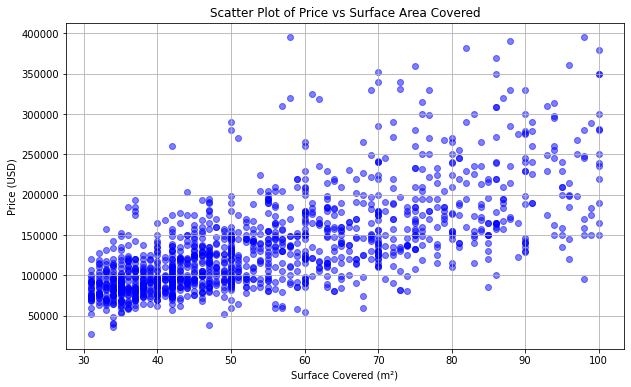

In [ ]:


plt.figure(figsize=(10, 6))
plt.scatter(df['surface_covered_in_m2'], df['price_aprox_usd'], color='blue', alpha=0.5)
plt.title('Scatter Plot of Price vs Surface Area Covered')
plt.xlabel('Surface Covered (m²)')
plt.ylabel('Price (USD)')
plt.grid(True)
plt.show()


The scatter plot above visually represents the relationship between property prices (in USD) and their surface areas (in square meters). This analysis is crucial for identifying trends in the real estate market, particularly how property size influences pricing.

DETAILED EXAMINATION OF THE SCATTER PLOT
- Price Range: The y-axis indicates property prices, which range from approximately USD50,000 to slightly above USD400,000. This broad range highlights the diverse pricing within the dataset.
- Surface Area Spectrum: The x-axis details the surface area covered by properties, from about 30 m² to 100 m². This spread includes various property types, from compact units to more spacious homes.
- Relationship between Price and Surface Area: The plot displays a general trend where larger properties tend to have higher prices. However, the correlation isn't strongly linear, and there's considerable variability, suggesting other factors also play a significant role in pricing.
- Data Point Clustering: A noticeable cluster of data points exists between 50 m² and 80 m², with prices mostly ranging from USD100,000 to USD250,000. This cluster likely represents a prevalent property type or market segment.
- Price Outliers: Outliers are evident, especially at higher price points where properties with similar sizes diverge greatly in price. These may be due to premium features, desirable locations, or unique market conditions.

STRATEGIC INSIGHTS
- Market Analysis: Real estate professionals can use this data to segment the market based on size and price, developing targeted sales strategies for different buyer groups.
- Competitive Pricing Strategies: Identifying the dense clusters of prices and sizes can help stakeholders set competitive and realistic prices for properties, aligning their offerings with market expectations.
- Identifying Investment Potential: The plot can guide investors to explore segments with lower density—potential areas for investment where competition might be lower and the potential for appreciation higher.
- Implications for Urban Development: Urban planners can utilize this information to better understand housing demand across different sizes and price points, aiding in zoning and urban development planning to meet the community's needs.

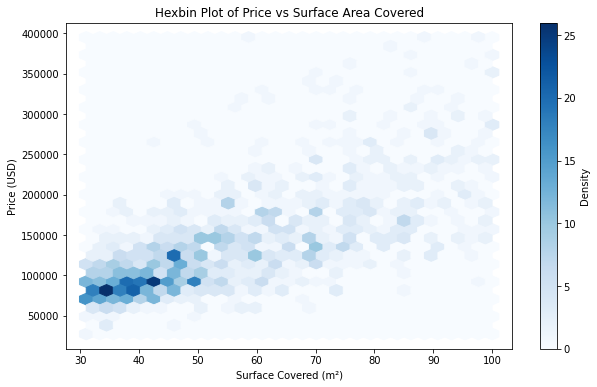

In [ ]:
#Hexbin Plot:
plt.figure(figsize=(10, 6))
plt.hexbin(df['surface_covered_in_m2'], df['price_aprox_usd'], gridsize=30, cmap='Blues')
plt.colorbar(label='Density')
plt.title('Hexbin Plot of Price vs Surface Area Covered')
plt.xlabel('Surface Covered (m²)')
plt.ylabel('Price (USD)')
plt.show()


The hexbin plot above displays the relationship between the price (possibly of properties) and the surface area covered in square meters. This type of visualization is effective for showing the concentration of data points in two-dimensional space, helping to manage areas where traditional scatter plots may suffer from excessive overlapping due to large data sets.
Here's a breakdown of the analysis:
- Density Representation: The plot uses varying shades of blue to indicate the concentration of data points. Darker shades denote higher densities, showing where most data is clustered.
- Distribution of Prices: The bulk of lower-priced items fall within the 40 to 70 square meters range. There's a noticeable but sparser spread of data points at higher price levels extending towards 100 square meters.
- Overall Trend: The data generally shows an upward trend in price with an increase in surface area, particularly in the darkest zones of the plot.
The cluster of points in the mid-sized area (50-70 m²) at lower price points may reflect a prevalent property size for more budget-conscious segments.
- Outliers and Range: The plot shows fewer points at the high-price and large-area extremes.
Occasional light hexagons at higher prices for smaller areas might indicate premium properties or require further scrutiny for data errors.
- Market Implications: The visualization could reflect market trends, highlighting the most popular sizes and price brackets.
The decrease in density at higher price and size categories could suggest a limited market for more expansive and pricier properties.
- Strategic Uses: This plot can guide buyers or investors in understanding typical price ranges and expected property sizes. For developers or sellers, recognizing where sales are most concentrated can aid in tailoring development and marketing strategies.

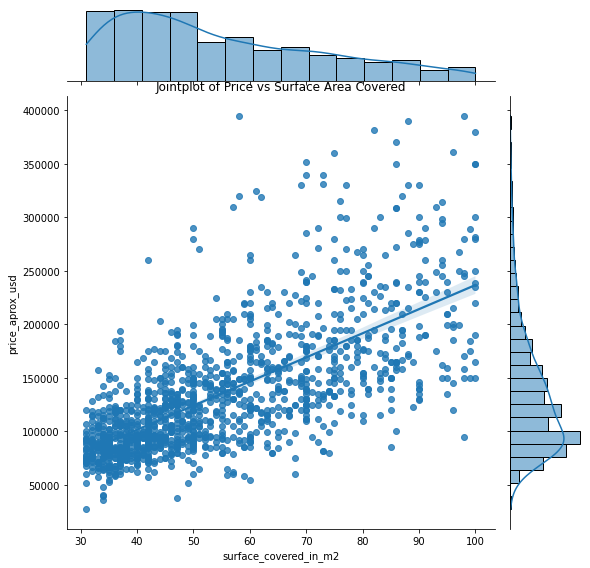

In [ ]:
#Jointplot (with Regression Line):

sns.jointplot(x='surface_covered_in_m2', y='price_aprox_usd', data=df, kind='reg', height=8)
plt.title('Jointplot of Price vs Surface Area Covered')
plt.show()


The jointplot above depicts the correlation between property prices and their surface area measured in square meters. This graph combines elements of both scatter plots and histograms to simultaneously show the relationship between the two variables and their individual distributions.

ANALYSIS OF THE SCATTER PLOT:
- Trend Line: The trend line suggests a positive correlation, indicating that as the surface area increases, the price typically rises as well.
- Data Clustering:
Most of the data points are concentrated at the lower ranges of both price and surface area, particularly from 40 to 80 square meters.
Data points thin out as the price and surface area scale up, indicating fewer properties at these higher levels.
- Outliers: There are noticeable outliers, particularly in the segments with larger areas and higher prices, which could represent premium properties that are priced above the norm for similar-sized properties.
  
ANALYSIS OF MARGINAL HISTOGRAMS:
- Price Histogram (Top): This histogram reveals that the bulk of properties are priced between USD100,000 and USD200,000. The distribution skews to the right, showing several properties that are much more expensive than the average.
- Surface Area Histogram (Right): This histogram shows a concentration of properties with areas between 50 and 70 square meters. It also shows a rightward skew, indicating the presence of larger properties beyond the common range.

INSIGHTS AND IMPLICATIONS:
- Market Trends: The plot indicates a typical property market scenario with most transactions occurring in a mid-range of sizes and prices, but with some transactions at the high end skewing the averages.
- Decision Making for Buyers/Sellers: For buyers, this graph helps set expectations for the common sizes and prices in the market. Sellers and developers might use this information to gauge which sizes are more popular and could sell faster.
- Pricing Strategy: The trend line provides a basic predictive insight into how surface area might influence pricing, though variations are significant at higher tiers of size and price.

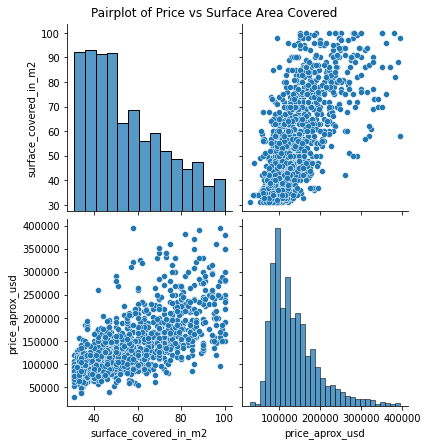

In [ ]:
#Pairplot:
sns.pairplot(df, vars=['surface_covered_in_m2', 'price_aprox_usd'], height=3)
plt.suptitle('Pairplot of Price vs Surface Area Covered', y=1.02)
plt.show()


The pairplot above analyses the relationship between property prices (in USD) and their surface areas (in square meters). This plot incorporates histograms that display the distribution of each variable independently, along with scatter plots that show how these two variables are related.

ANALYSIS OF SCATTER PLOTS:
- Upper Right Scatter Plot: This plot visualizes the data points depicting the relationship between surface area and price. The scatter of points is relatively dense, showing no clear linear relationship. This suggests that while properties with larger areas might typically have higher prices, other factors also play significant roles in pricing.
- Lower Left Scatter Plot: Essentially reflecting the upper right plot with axes inverted, this plot offers another perspective on the same data relationship.
ANALYSIS OF HISTOGRAMS:
- Surface Area Distribution (Top Left Histogram): The histogram indicates a peak in properties sized between 70 to 90 square meters, with fewer properties as the area increases or decreases. The distribution is skewed to the left, showing fewer larger properties.
- Price Distribution (Bottom Right Histogram): This histogram highlights a concentration of property prices in the 100,000 to 200,000 range. The distribution shows a normal trend with a slight skew to the right, pointing to a minority of properties at higher price points.

INSIGHTS AND IMPLICATIONS:
- Correlation Between Size and Price: The scatter plots suggest that the relationship between property size and price isn't directly proportional, influenced by various factors such as location, condition of the property, and overall market trends.
- Typical Market Offerings: The histograms show that the most common properties in the market are those with surface areas between 70 to 90 square meters and priced between 100,000 to 200,000, indicating these are typical or preferred ranges in the market.
- Market Diversity: The variability shown in both the scatter plots and the skewed histograms illustrates the diversity within the market. Properties that deviate from the common size and price ranges could represent unique offerings or specific market niches.


### 5.2.3 Variable- Price vs Latitude Distribution

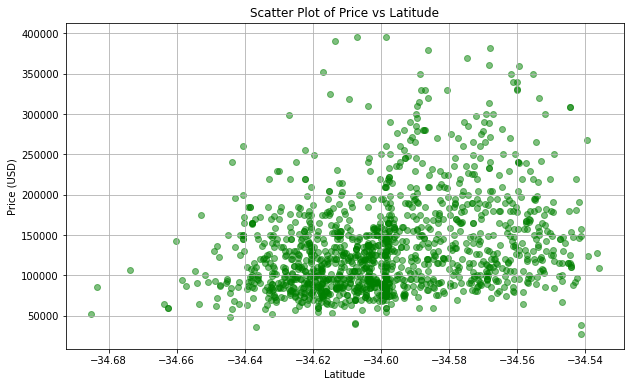

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(df['lat'], df['price_aprox_usd'], color='green', alpha=0.5)
plt.title('Scatter Plot of Price vs Latitude')
plt.xlabel('Latitude')
plt.ylabel('Price (USD)')
plt.grid(True)
plt.show()


The scatter plot above illustrates the relationship between property prices (in USD) and their latitudes. Below is an analysis based on the details from the visualization:

DATA DISTRIBUTION:
- Latitude Range: The data spans latitudes from approximately -34.68 to -34.54. This range likely represents a specific geographic area or city.
- Variability in Prices: Prices range from 50,000 to 400,000, showing considerable variability within the latitudinal bounds.

TRENDS AND PATTERNS:
- Lack of Linear Correlation: The plot does not show a definitive linear relationship between latitude and property prices, suggesting that latitude alone may not be a reliable predictor of property value.
- Density Clusters: There are dense clusters around certain latitudes, particularly around -34.62, extending towards -34.60, where a broad spectrum of prices is observed.

OBSERVATIONS ON PRICE DISTRIBUTION:
- Concentration of Lower Prices: Lower-priced properties are more concentrated around latitudes -34.68 and -34.54.
- Distribution of Higher Prices: Properties with higher prices appear to be somewhat more frequent around latitudes -34.56 to -34.58.

IMPLICATIONS:
- Influence of Other Factors: The disparity in prices at similar latitudes indicates that other factors such as neighborhood characteristics, proximity to urban centers, local amenities, or environmental aspects might play a more significant role in determining property prices than latitude alone.
- Advice for Buyers and Investors: Detailed local information about infrastructure and community services will be crucial for making informed purchasing or investment decisions, rather than focusing solely on geographic location.
- Strategic Insights for Market Stakeholders: For those in real estate analysis or development, understanding what influences price variations at these latitudes is key to formulating effective strategies and focusing on targeted areas for development.


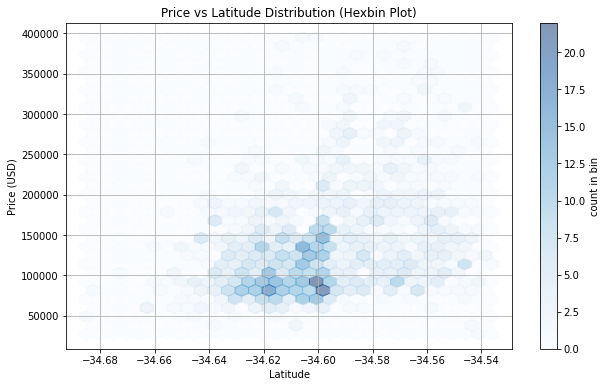

In [ ]:
plt.figure(figsize=(10, 6))
plt.hexbin(df['lat'], df['price_aprox_usd'], gridsize=30, cmap='Blues', alpha=0.5)
plt.colorbar(label='count in bin')
plt.title('Price vs Latitude Distribution (Hexbin Plot)')
plt.xlabel('Latitude')
plt.ylabel('Price (USD)')
plt.grid(True)
plt.show()


The hexbin plot above displays the distribution of property prices (in USD) in relation to latitude, employing hexagonal bins to effectively represent data density where a traditional scatter plot might become too cluttered.

ANALYSIS OF THE HEXBIN PLOT:
- Density Levels: Each hexagon's shade indicates the density of data points it contains, with darker colours signifying higher densities. The scale on the right side of the plot quantifies these densities.
- Latitude Trends: The latitudes range from approximately -34.68 to -34.54. A notable accumulation of data points is centred around latitude -34.60, suggesting a hot spot where properties are frequently listed or sold.
- Price Variability: Property prices vary widely but generally span from 50,000 to 400,000. Lower to mid-range prices, particularly from 100,000 to 150,000, show a significant clustering at latitude -34.60.
- Areas of High Density: The most populated bins, indicated by the darkest hexagons, are found predominantly in the lower to middle price ranges. This pattern suggests that these price levels see the highest volume of transactions.
The latitude with the highest concentration of properties (around -34.60) also corresponds with a wide spectrum of prices but is particularly dense in the lower to mid-price segment.

INSIGHTS AND STRATEGIC IMPLICATIONS:
- Location Influence on Pricing: The plot suggests that certain latitudes, like around -34.60, are preferred for buyers within certain budget limits, reflecting areas with a high density of lower to mid-priced properties.
Conversely, higher-priced properties are less common and more scattered, potentially pointing to a limited supply or higher demand in these areas.
- Strategic Real Estate Planning: Real estate professionals can use this data to focus their marketing and sales strategies in areas with the highest transaction volumes.
For buyers, this visualization can help pinpoint where the most competitive pricing is typically found.
- Understanding Market Dynamics: The distribution across latitudes may also indicate broader socio-economic trends affecting property values, like neighbourhood popularity or accessibility to amenities.


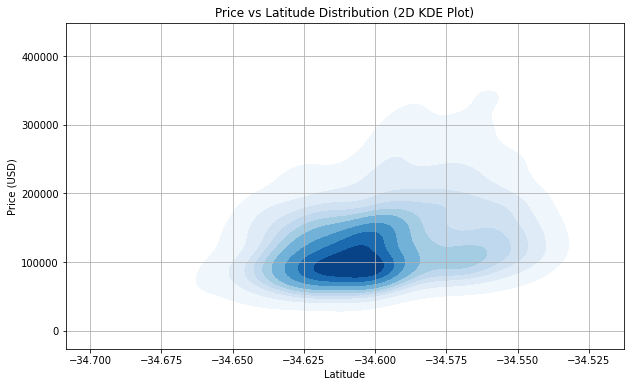

In [ ]:
plt.figure(figsize=(10, 6))
sns.kdeplot(x=df['lat'], y=df['price_aprox_usd'], cmap='Blues', fill=True)
plt.title('Price vs Latitude Distribution (2D KDE Plot)')
plt.xlabel('Latitude')
plt.ylabel('Price (USD)')
plt.grid(True)
plt.show()


The 2D Kernel Density Estimate (KDE) plot above illustrates the distribution of property prices (in USD) against latitude, offering a smooth, graphical representation of data densities for these two variables: price and latitude.

DETAILED OBSERVATIONS FROM THE KDE PLOT:
- Density Concentration: The darkest blue area represents the highest density of data points, located around latitude -34.60 with prices mostly ranging from 100,000 to 150,000. This indicates a high frequency of properties within this specific price bracket and geographic area.
- Data Spread: Lighter shades indicate lower densities, showing that the distribution of property prices broadens over a wider range of latitudes and extends across varying price levels. The decrease in density is evident as prices deviate from the central range and as latitudes move away from -34.60.
- Latitude Coverage: The plot spans latitudes from approximately -34.70 to -34.525. The most significant concentration of properties, however, is tightly grouped between -34.625 and -34.575.
- Price Distribution: Vertically, the plot shows a dense clustering in lower to mid-price ranges, with sparse occurrences stretching up to the $400,000 mark.

INSIGHTS AND STRATEGIC IMPLICATIONS:
- Market Hotspot: The core area of density reveals where most real estate transactions are likely occurring, useful for both buyers seeking properties within common market ranges and sellers gauging where the majority of potential buyers might be.
- Pricing Patterns: The concentration in lower price ranges near a specific latitude suggests a competitive market segment, while the sparsity in higher price ranges may point to less frequent, more exclusive property deals.
- Geographic Preferences: The concentration around certain latitudes might reflect the influence of local amenities, accessibility, and neighborhood desirability on property prices.
- Targeting and Development: Real estate agents and developers can leverage this data to focus their marketing and development efforts where properties are most densely packed, tailoring their strategies to meet market demand effectively.


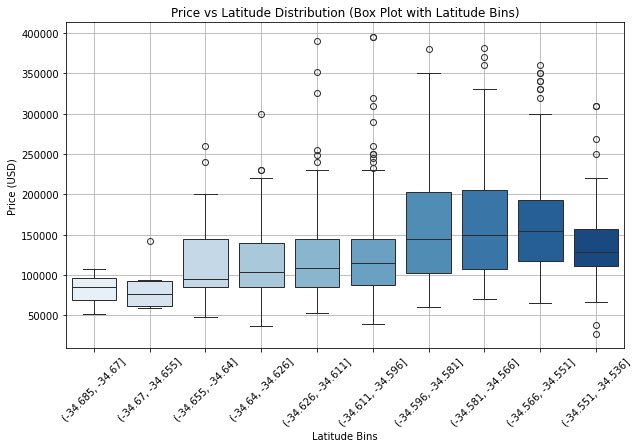

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=pd.cut(df['lat'], bins=10), y='price_aprox_usd', data=df, palette='Blues')
plt.title('Price vs Latitude Distribution (Box Plot with Latitude Bins)')
plt.xlabel('Latitude Bins')
plt.ylabel('Price (USD)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


The box plot above illustrates the distribution of property prices (in USD) across various latitude bins, shedding light on the influence of geographical location on property values within a defined area.

BREAKDOWN OF BOX PLOT COMPONENTS:
- Median Prices: Each box in the plot shows the median price (the line at the centre of the box), along with the quartiles and the overall price range within specific latitude bins. The median prices vary between bins, indicating that some geographic areas might be more desirable or have higher property values due to local factors.
- Quartile Spread and Price Range: The edges of each box mark the first (Q1) and third (Q3) quartiles, representing the middle 50% of data. The interquartile range (IQR) between these quartiles shows the spread of the central bulk of prices. The whiskers extending from the boxes represent the range of prices that fall within 1.5 times the IQR from the quartiles, excluding any outliers.
- Outliers: Outliers are depicted as diamond shapes and represent prices that are notably higher or lower than typical within the bin. These may be due to properties with unique characteristics, premium locations, or special circumstances affecting their values. Several bins feature outliers, highlighting substantial deviations in price within those geographical segments.

ANALYSIS OF LATITUDE BINS
- Higher Price Latitude Bins: Bins near -34.56 to -34.55 exhibit higher median prices and tighter IQRs, suggesting stable and higher market values, possibly indicating areas with greater demand.
- Bins with Wide Price Variability: Bins around -34.68 to -34.67 and -34.61 to -34.60 show greater price variability and wider IQRs. This could reflect a diversity of property types or different levels of neighbourhood appeal.

STRATEGIC CONSIDERATIONS
- Targeting Market Segments: The detailed price distribution allows real estate professionals to strategically target marketing and sales efforts towards specific latitude bins that match their business goals, whether seeking high-value markets or exploring areas with variable pricing.
- Investment Strategies: Investors might be particularly interested in areas with consistent pricing and fewer outliers, as these regions could provide more stable investment opportunities.
- Insights into Market Behaviour: Understanding variations in property prices across latitudes can help stakeholders grasp the impact of geographic and local amenities on real estate values, aiding in more informed decision-making.


In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(df['lon'], df['price_aprox_usd'], color='green', alpha=0.5)
plt.title('Price vs Longitude Distribution')
plt.xlabel('Longitude')
plt.ylabel('Price (USD)')
plt.grid(True)
plt.show()


The scatter plot above illustrates the relationship between property prices (in USD) and their geographic longitude. This visualization helps to analyze how property values vary along different longitudinal coordinates.

OBSERVATIONS FROM THE SCATTER PLOT
- Longitude Range: The data covers longitudes from approximately -58.550 to -58.375.
Prices vary significantly, ranging from under 50,000 to above 350,000.
- Concentration of Data Points: The bulk of the properties are concentrated between longitudes -58.500 to -58.425, indicating a cluster of real estate activity in this segment.
- Distribution of Property Prices: The properties exhibit a wide array of prices across the longitude spectrum, with many properties priced around 100,000 to 150,000, and occasional high-priced properties dispersed throughout.

INSIGHTS AND STRATEGIC CONSIDERATIONS
- Lack of Direct Correlation with Longitude: The plot does not reveal a consistent correlation between longitude and property prices. Instead, prices seem to be influenced by other variables, possibly including specific neighborhood attributes, the quality of properties, and prevailing local market conditions, rather than just their longitudinal position.
- Real Estate Market Activity: The dense clustering of properties in certain longitudinal ranges likely signifies areas with heightened real estate activity, potentially urban centers or other developed regions. This information could be crucial for investors or real estate professionals focusing on these densely populated markets.
- Opportunities for Diverse Investments: Given the variability in prices at similar longitudes, the market offers a range of investment opportunities, from more affordable options to luxury properties. Stakeholders should consider conducting detailed analyses of local markets to pinpoint optimal investment and development sites.

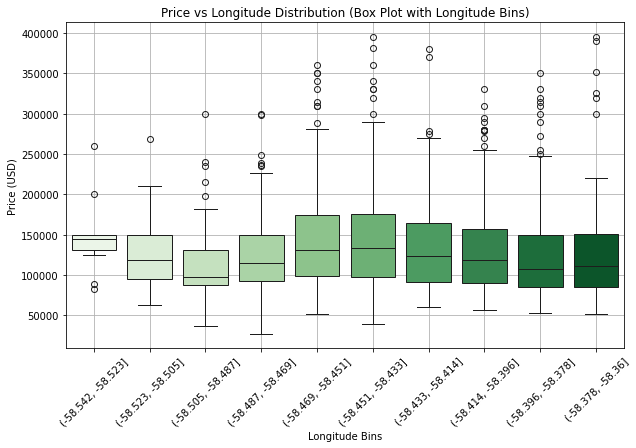

In [ ]:
#Box Plot with Longitude Bins
plt.figure(figsize=(10, 6))
sns.boxplot(x=pd.cut(df['lon'], bins=10), y='price_aprox_usd', data=df, palette='Greens')
plt.title('Price vs Longitude Distribution (Box Plot with Longitude Bins)')
plt.xlabel('Longitude Bins')
plt.ylabel('Price (USD)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


The box plot above illustrates the distribution of property prices (in USD) within different longitude bins. This graphical representation helps assess how property values vary across specified longitudinal ranges.

COMPONENTS OF THE BOX PLOT
- Median: Each box shows the median price within that specific longitude bin.
- Quartiles: The lower and upper edges of each box denote the first and third quartiles, respectively, representing the central 50% of data in that bin.
- Whiskers: The lines extending from each box indicate the range of prices within 1.5 times the interquartile range from the quartiles, excluding outliers.
- Outliers: Points shown outside the whiskers represent exceptional values that stand out from the normal range.

LONGITUDE BINS ANALYSIS
- Longitude bins extend from roughly -58.541 to -58.361. The variability in the height of the boxes across bins shows different degrees of price dispersion, with some bins having a more compact interquartile range, suggesting a more uniform pricing within those areas.
- Several bins feature outliers, highlighting substantial variations in price that may reflect properties with distinctive characteristics or those in premium locales.

TRENDS IN PROPERTY PRICES ACROSS LONGITUDE BINS
- There isn't a consistent trend in median prices across longitude bins, indicating that longitude alone may not be a predominant factor affecting property prices.
- Each bin shows varied price distributions, with some bins displaying higher medians and broader price ranges, possibly pointing to areas that include both economical and luxury properties.

INSIGHTS AND STRATEGIC IMPLICATIONS
- Market Variety: The range in prices across the longitude bins underscores the market's diversity, with different areas likely featuring a mix of property types and neighborhood environments.
- Strategic Pricing: Knowledge of price distributions and outlier presence in specific bins can assist realtors and developers in crafting targeted pricing strategies to align with local market conditions.
- Identifying Investment Spots: Investors might find this data useful for pinpointing areas that align with their investment criteria, particularly in bins with stable pricing and fewer outliers for potentially safer investments.
- Detailed Location Analysis: For more comprehensive insights, additional factors like local amenities, economic conditions, and specific property features should be considered to fully explain the observed pricing trends within these longitude bins.

<Figure size 720x576 with 0 Axes>

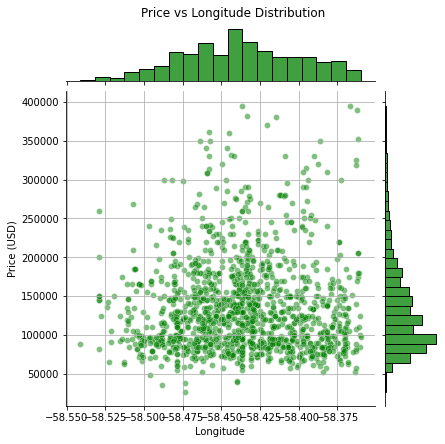

In [ ]:
#Joint Plot:
plt.figure(figsize=(10, 8))
sns.jointplot(x=df['lon'], y=df['price_aprox_usd'], kind='scatter', color='green', alpha=0.5)
plt.suptitle('Price vs Longitude Distribution', y=1.02)
plt.xlabel('Longitude')
plt.ylabel('Price (USD)')
plt.grid(True)
plt.show()


The joint plot above examines the relationship between property prices (in USD) and longitude, combining a scatter plot with marginal histograms to provide a detailed view of geographical distribution and price variation.

ANALYSIS OF THE SCATTER PLOT
- Spread of Data Across Longitude: The scatter plot reveals property prices spanning longitudes from about -58.550 to -58.375. Prices range from approximately 50,000 to just over $350,000, showcasing substantial variation within this geographic scope.
- Concentration of Data Points: There appears to be a denser aggregation of data points in the central longitudes of the plot, indicating a concentration of median-priced properties in these regions.

ANALYSIS OF MARGINAL HISTOGRAMS
- Longitude Distribution (Top Histogram): The histogram along the top suggests a relatively even distribution of properties across the longitude range, with a modest peak in the center. This indicates that properties are most frequently listed or sold in the middle of this longitudinal range.
- Price Distribution (Right Histogram): The histogram on the right shows most property prices are clustered at the lower to middle end of the scale, with fewer properties at higher price points, emphasizing that high-priced properties are less prevalent.

INSIGHTS AND STRATEGIC IMPLICATIONS
- Geographical Market Focus: The clustering of properties at median price levels in central longitudes likely points to areas of higher demand or desirable neighborhoods. These zones could be key targets for buyers and investors looking for robust market activity.
- Adjusting Pricing Strategies: Real estate professionals could use this data to fine-tune their pricing strategies, focusing on the densely populated price ranges to maximize engagement and sales.
- Identifying Investment Opportunities: The rarity of higher-priced properties could indicate a niche market with room for growth or a chance for developers to introduce luxury offerings. Meanwhile, the abundance of more affordably priced homes suggests a strong market for budget-conscious residential developments or investments.

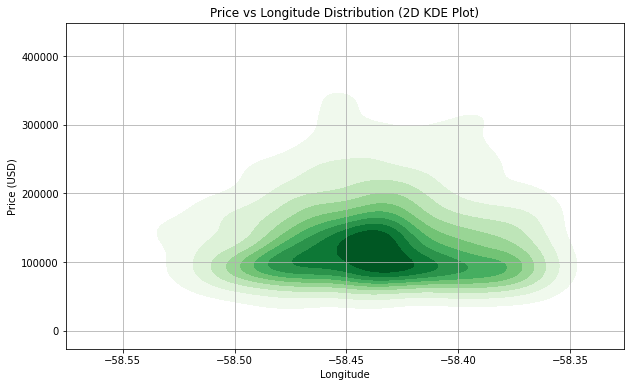

In [ ]:
#2D Kernel Density Estimation (KDE) Plot:
plt.figure(figsize=(10, 6))
sns.kdeplot(x=df['lon'], y=df['price_aprox_usd'], cmap='Greens', fill=True)
plt.title('Price vs Longitude Distribution (2D KDE Plot)')
plt.xlabel('Longitude')
plt.ylabel('Price (USD)')
plt.grid(True)
plt.show()


The 2D Kernel Density Estimate (KDE) plot above shows the distribution of property prices across different longitudes. This visualization helps to identify where property prices are most densely aggregated, which is useful for pinpointing areas of high real estate activity.

KEY OBSERVATIONS FROM THE KDE PLOT
- Central Density Area: The most intense density shown on the plot is centered around the longitude of approximately -58.45. This suggests a significant concentration of properties in this area, possibly indicating a desirable or heavily developed location.
- Spread of Prices: The plot displays a vertical spread of prices from low to high, with the densest areas suggesting a clustering of mid-range priced properties. However, there are peaks extending towards higher prices, indicating the presence of more expensive properties within this longitudinal range.
- Longitudinal Coverage: The density of properties stretches from about -58.55 to -58.35 longitude, with a noticeable tapering off at the edges of this range. The highest concentration remains near the center at -58.45.

STRATEGIC INSIGHTS AND IMPLICATIONS
- Real Estate Development Focus: The area around the highest density peak could be a prime target for real estate development and investment, as it likely represents a core market area with substantial activity and demand.
- Emerging Investment Opportunities: Regions just outside the densest area, where property prices are still represented but less concentrated, may offer promising investment opportunities. These areas might benefit from future growth and development, potentially yielding good returns as the market expands.
- Informed Decision Making for Market Stakeholders: For investors, developers, and policymakers, understanding where property prices are most concentrated can guide strategic decisions regarding where to allocate resources, enhance infrastructure, or focus marketing efforts.

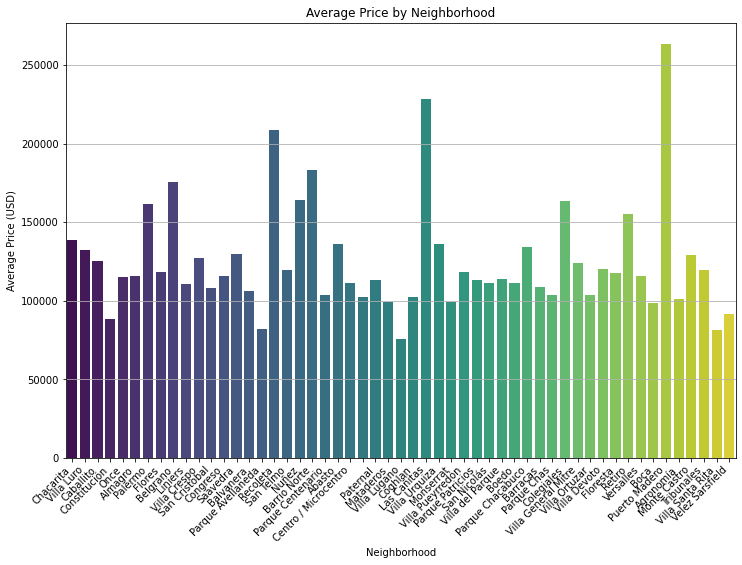

In [ ]:
plt.figure(figsize=(12, 8))
sns.barplot(x='neighborhood', y='price_aprox_usd', data=df, ci=None, palette='viridis')
plt.title('Average Price by Neighborhood')
plt.xlabel('Neighborhood')
plt.ylabel('Average Price (USD)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.show()


The bar chart above displays average property prices across various neighborhoods, color-coded to represent each area or cluster of areas. This visual representation is useful for comparing property prices across different regions and gauging the economic landscape of the housing market.

ANALYSIS OF THE BAR CHART
- Price Variability Across Neighborhoods: The chart shows a significant variance in average prices, ranging from neighborhoods with prices as low as USD50,000 to others where prices exceed USD200,000, illustrating the diverse economic profiles across the areas.
- Neighborhood Comparisons: Neighborhoods depicted in darker purple hues on the left side of the chart generally exhibit lower average prices. As the colors transition to greens and yellows toward the right, there is a noticeable increase in average prices, suggesting these areas are more affluent or sought after.
Peaks in average prices, particularly noticeable in the middle sections in teal and at the extreme right in bright green, indicate areas with high real estate value, potentially due to favorable location attributes, superior amenities, or other desirable qualities.

STRATEGIC INSIGHTS AND IMPLICATIONS
- Market Demographics: This chart effectively segments the real estate market by neighborhood, allowing real estate agents, developers, and investors to understand which areas are considered premium and which are more budget-friendly.
- Identifying Investment Hotspots: Developers and investors can spot potential investment areas based on average prices. Neighborhoods showing an upward trend in average prices may represent growing demand and a good opportunity for property value appreciation.
- Marketing Approaches: Real estate professionals can customize their marketing strategies according to the demographic and economic profile of each neighborhood. More luxurious marketing approaches may resonate better in the higher-priced, yellow-colored neighborhoods, whereas more economical and practical marketing could appeal to the areas shown in purple and blue.
- Purchasing Decisions: Buyers can use this chart to determine which neighborhoods align with their budget and preferences, providing insights into the type of community and facilities they can expect based on the prevailing price ranges.

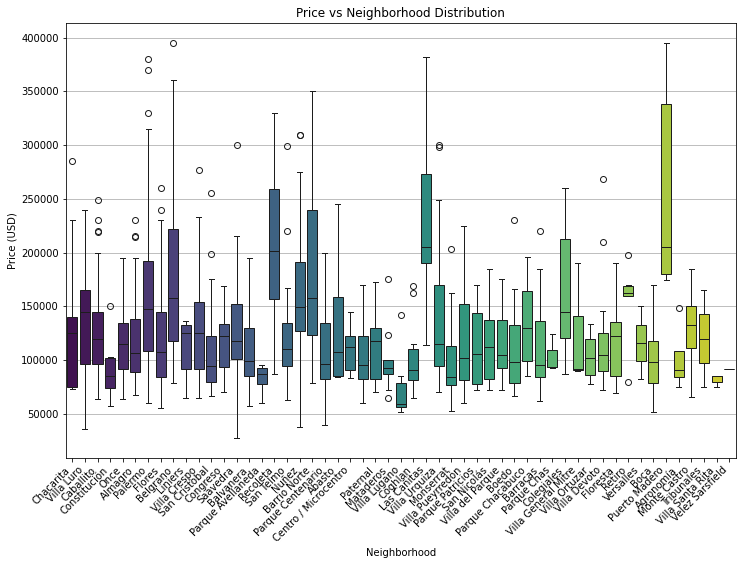

In [ ]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='neighborhood', y='price_aprox_usd', data=df, palette='viridis')
plt.title('Price vs Neighborhood Distribution')
plt.xlabel('Neighborhood')
plt.ylabel('Price (USD)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.show()


The box plot above shows the distribution of property prices across different neighborhoods. This type of visualization is effective for comparing median prices, the range of prices, and the presence of outliers within each area.

DETAILED BEAKDOWN OF THE BOXPLOT
- Median Prices: Each box features a median line, providing a straightforward comparison of the typical property prices in each neighborhood, offering a snapshot of what buyers might expect to pay.
- Interquartile Range (IQR): The height of each box represents the interquartile range, encompassing the middle 50% of property prices within each neighborhood. This measurement helps assess the spread and consistency of property prices.
- Whiskers and Outliers: Whiskers extending from the boxes show the typical price range, excluding any outliers, which is usually set at 1.5 times the IQR from the quartiles. This helps define the normal price range for most properties.
Outliers, depicted as individual dots, represent property prices that are significantly higher or lower than most in the neighborhood. These can indicate exceptionally high-value properties or significantly undervalued listings.

INSIGHTS FROM NEIGHBORHOOD PRICE DISTRIBUTIONS
- Price Range Observations: Neighborhoods such as "Palermo" and "Belgrano" exhibit a broad price range and several outliers, suggesting a mix of property types from standard residences to high-end homes.
Neighborhoods like "Villa Urquiza" and "Caballito" show tighter price ranges with fewer outliers, indicating more uniformity in property pricing which might be more predictable for buyers.
- Affluent Neighborhoods: The rightmost neighborhood, highlighted in bright yellow, stands out with higher median prices and a number of high outliers, indicating it is likely an upscale area with luxury property options.
- Economic Variability: Neighborhoods shown in darker hues (purple and blue) toward the chart's left have lower median prices but a considerable spread within the interquartile range, pointing to a diverse economic profile within these areas.

STRATEGIC IMPLICATIONS OF REAL ESTATE STAKEHOLDERS
- Investment Targeting: The data allows investors and developers to spot neighborhoods with potential for growth or high-value investment, particularly those areas with a wide range of prices and numerous high-price outliers.
- Marketing Strategies: Real estate agents can tailor their marketing efforts based on the price distribution in each neighborhood, promoting luxury features in affluent areas or highlighting value for money in more evenly priced regions.
- Guidance for Buyers: The plot can help prospective buyers identify neighborhoods that align with their financial capabilities and preferences, considering both median prices and the potential for encountering significantly priced properties.

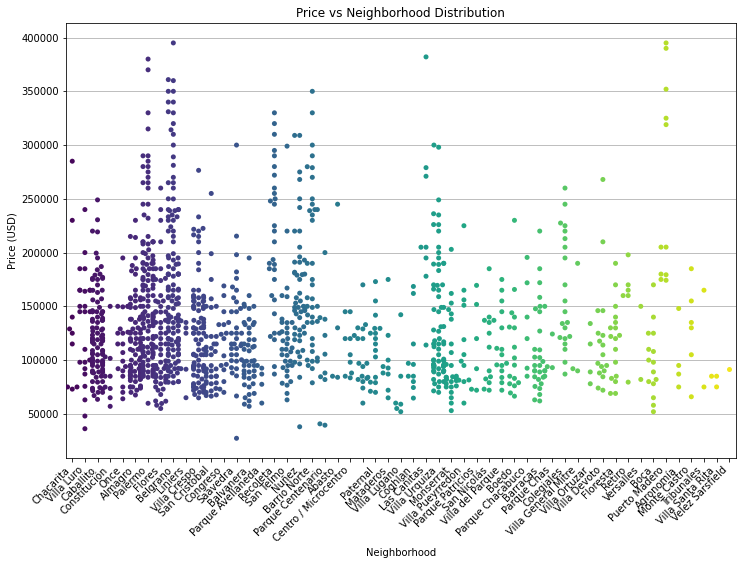

In [ ]:
plt.figure(figsize=(12, 8))
sns.swarmplot(x='neighborhood', y='price_aprox_usd', data=df, palette='viridis')
plt.title('Price vs Neighborhood Distribution')
plt.xlabel('Neighborhood')
plt.ylabel('Price (USD)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.show()


The scatter plot above showcases the distribution of property prices across various neighborhoods, with each area distinguished by a unique color. This visualization is essential for understanding the variations in property values across the city and pinpointing specific trends or anomalies within certain neighborhoods.

BREAKDOWN OF THE SCATTER PLOT
- Price Distribution: The y-axis represents the price of properties in USD, ranging broadly from around 50,000 to above 400,000. Such a range indicates significant variability in property values across different parts of the city.
- Neighborhood Differentiation: Neighborhoods are color-coded, aiding in the visual differentiation between them. It’s noticeable that some neighborhoods, especially those colored in yellow and green, have higher median prices and less variance compared to others.
- Outliers and High-Value Properties: Certain neighborhoods, particularly those in green and yellow, exhibit outliers where a few properties are priced much higher than the majority in the same area, indicating pockets of high-value properties.
- Density of Data Points: Neighborhoods shown in purple and blue demonstrate denser clustering at lower price points, suggesting these areas are predominantly composed of more affordable housing options.

INSIGHTS AND STRATEGIC RECOMMENDATIONS
- Market Segmentation Insight: The plot effectively segments the housing market by neighborhood, enabling real estate firms and investors to tailor their approaches based on the unique characteristics of each area.
- Identifying Investment Opportunities: Neighborhoods exhibiting significant price variability and notable outliers might offer lucrative investment opportunities, either through high-end properties or potential bargains in undervalued areas.
- Strategies for Pricing: Real estate agents can leverage this detailed overview of neighborhood pricing to strategically price listings and guide buyers on expected market rates, enhancing their service offerings.
- Guidance for Urban Development: Urban planners and developers can use this information to identify areas that could benefit from strategic development or revitalization, especially those neighborhoods with lower average prices but high developmental potential.

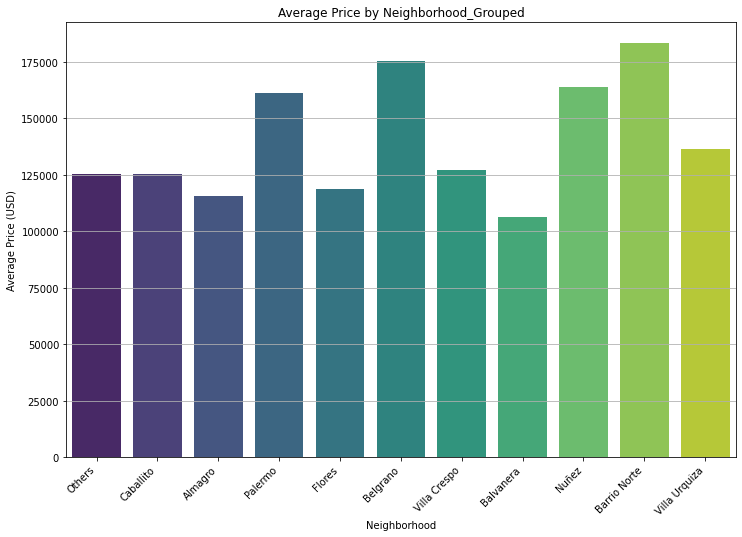

In [ ]:
plt.figure(figsize=(12, 8))
sns.barplot(x='neighborhood_grouped', y='price_aprox_usd', data=df, ci=None, palette='viridis')
plt.title('Average Price by Neighborhood_Grouped')
plt.xlabel('Neighborhood')
plt.ylabel('Average Price (USD)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.show()


The bar chart above displays the average property prices across different neighborhoods, providing a comparative view of real estate values across the area. Each bar on the chart represents a neighborhood, with the height indicating the average property price in that location.

BREAKDOWN OF THE BAR CHART
- Variation in Prices: Prices range from the lowest in the "Others" category, which likely includes a variety of less costly areas, to the highest in neighborhoods like "Barrio Norte" and "Villa Urquiza," showcasing significant price disparities across neighborhoods.
- Neighborhood Price Insights: Neighborhoods such as "Caballito," "Almagro," and "Palermo" exhibit moderate to high average prices, suggesting they are middle to upper-middle-class areas.
"Flores" and "Belgrano" are depicted with higher average prices, with "Belgrano" appearing particularly upscale, indicating a more affluent demographic.
More economically priced neighborhoods like "Villa Crespo" and "Balvanera" show lower average prices, pointing to more affordable housing options within these areas.
- Premium Markets: "Nuñez," "Barrio Norte," and "Villa Urquiza" feature the highest average prices on the chart, indicating these are premium neighborhoods with potentially high-end residential properties.

INSIGHTS AND STRATEGIC CONSIDERATIONS
- Targeting Market Segments: Real estate agents can leverage this data to tailor their marketing and sales strategies to match the price levels and market characteristics of different neighborhoods.
-Identifying Investment Opportunities: Investors might target neighborhoods like "Barrio Norte" and "Villa Urquiza" for potential high returns due to their higher average prices and desirability. Alternatively, emerging markets like "Villa Crespo" and "Balvanera" may offer opportunities for entry-level investments.
- Development Potential: Developers could find valuable opportunities in neighborhoods with growing demand and moderate prices, such as "Caballito" and "Palermo," where there is room for new developments or refurbishments.
- Guidance for Buyers: This chart can help potential buyers determine which neighborhoods are within their budget and what type of communities they might be joining, based on the average pricing.

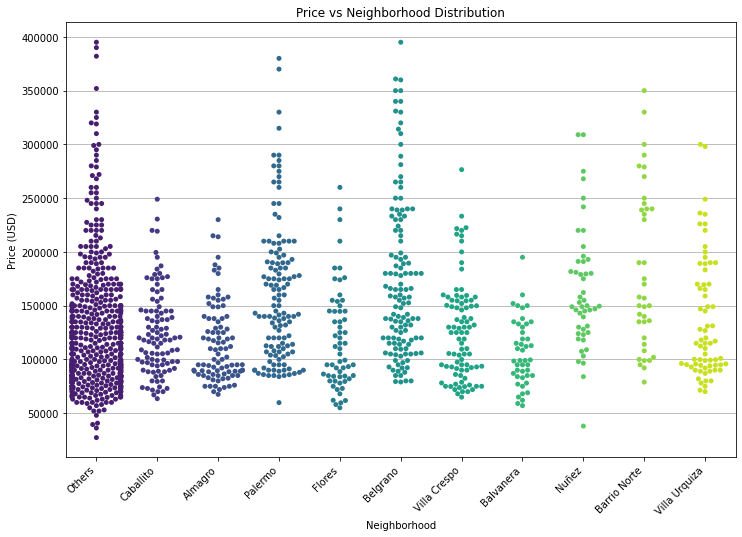

In [ ]:
plt.figure(figsize=(12, 8))
sns.swarmplot(x='neighborhood_grouped', y='price_aprox_usd', data=df, palette='viridis')
plt.title('Price vs Neighborhood Distribution')
plt.xlabel('Neighborhood')
plt.ylabel('Price (USD)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.show()

The chart above is a swarm plot that illustrates the distribution of property prices across different neighborhoods. This visualization effectively displays how property values vary within each area by spacing out the data points to avoid overlap, which helps in observing the spread and density of prices.

KEY OBSERVATIONS FROM THE SWARM PLOT
- Variability in Prices: Property prices range widely from under USD50,000 to over USD350,000, showing significant variability within the neighborhoods featured.
Each neighborhood exhibits a unique pattern of price distribution, highlighting distinct real estate dynamics.
- Detailed Neighborhood Analysis: The "Others" category includes a dense collection of properties predominantly at lower price points, which might include a variety of less expensive areas.
Neighborhoods like "Caballito" and "Palermo" display a wide range of prices but are mostly concentrated in the mid-price bracket.
Upscale neighborhoods such as "Belgrano," "Nuñez," and "Barrio Norte" have higher overall price levels with minimal low-priced properties and many high-end listings.
"Villa Urquiza" exhibits closely grouped prices, indicating a more uniform property value and perhaps a more consistent market.

STRATEGIC INSIGHTS AND IMPLICATIONS
- Market Segmentation: The plot effectively segments the real estate market by neighborhood, showcasing areas suited for different budget levels. This can guide real estate professionals in tailoring their strategies to specific market segments.

- Pricing Strategies: Insights into each neighborhood's price distribution can aid developers and agents in setting competitive prices for new listings to attract the intended buyers.

- Investment Opportunities: Neighborhoods with diverse pricing, like "Palermo" and "Caballito," offer varied investment possibilities, from renovation projects in lower-priced segments to high-end developments.

- Guidance for Buyers: The plot serves as a valuable tool for prospective buyers, helping them identify which neighborhoods align with their financial capabilities and housing needs.

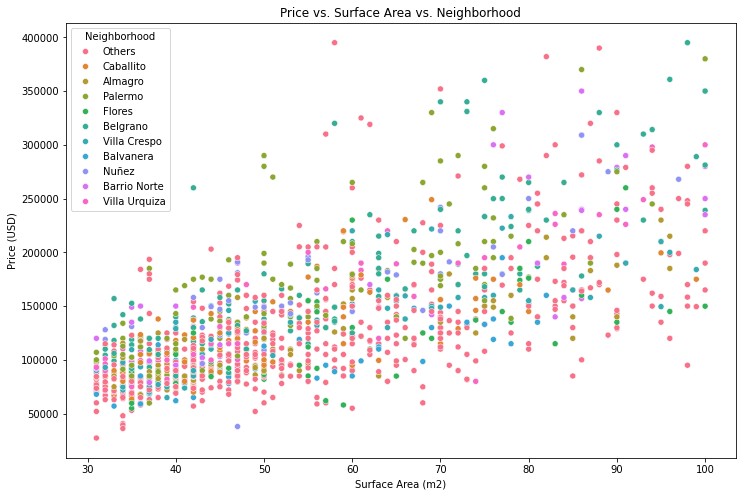

In [ ]:
# 1. Price vs. Surface Area vs. Neighborhood
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='surface_covered_in_m2', y='price_aprox_usd', hue='neighborhood_grouped')
plt.title('Price vs. Surface Area vs. Neighborhood')
plt.xlabel('Surface Area (m2)')
plt.ylabel('Price (USD)')
plt.legend(title='Neighborhood')
plt.show()

The scatter plot above illustrates the relationship between property prices, surface area, and neighborhood, using distinct colors to differentiate between various areas. This type of visualization is useful for analyzing how both property size and pricing vary across different parts of the city.

ANALYSIS OF THE SCATTER PLOT
- Distribution of Price and Surface Area: Property prices are displayed on the y-axis and surface areas on the x-axis, ranging from approximately 30 square meters to 100 square meters.
The plot indicates that typically, larger properties tend to be priced higher, although there is considerable variability across and within neighborhoods.
- Neighborhood Differentiation: Each neighborhood is represented by a unique color, which helps to identify specific trends or patterns related to each area. For example, neighborhoods like "Barrio Norte" (green) and "Villa Urquiza" (yellow) show a wide range of prices and property sizes, suggesting a varied property market.
More affordable property options seem prevalent in "Others" (purple) and "Caballito" (orange), where there is a noticeable clustering of properties at lower price points.
- Variability in Pricing: The upper price range is more evident in neighborhoods such as "Barrio Norte" and "Villa Urquiza," which may indicate these areas contain more high-end properties.
The lower price range is densely populated across most neighborhoods but is particularly concentrated in the "Others" category.

STRATEGIC INSIGHTS AND IMPLICATIONS
- Understanding Market Trends: This chart offers insights into the local real estate market, highlighting how property dimensions correlate with pricing within specific neighborhoods. This information is crucial for buyers looking for properties that fit specific size and budget requirements.
- Opportunities for Developers and Investors: By identifying areas with high demand for certain property types, developers and investors can tailor their projects to meet existing market needs, whether for larger properties or more budget-friendly options.
- Focused Marketing Efforts: Real estate agents can use these insights to market properties more effectively by highlighting the advantages of property size and affordability in targeted neighborhoods.
- Informed Buyer Decisions: Prospective buyers can leverage this data to pinpoint neighborhoods that offer the best value for their budget and space needs, facilitating better-informed purchasing decisions.

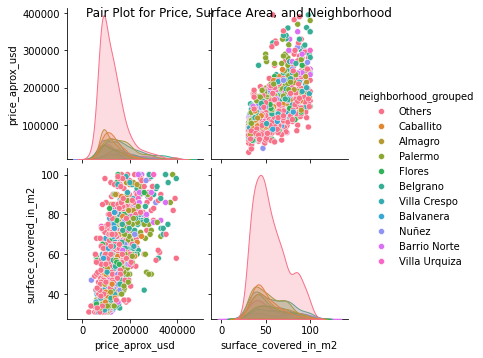

In [ ]:
# 2. Pair plot for numerical variables
sns.pairplot(df, vars=['price_aprox_usd', 'surface_covered_in_m2'], hue='neighborhood_grouped')
plt.suptitle('Pair Plot for Price, Surface Area, and Neighborhood')
plt.show()


The pair plot above offers a detailed visual comparison between property prices, surface areas, and their distribution across different neighborhoods, distinguished by various colors. This multi-dimensional visualization helps in understanding the relationships and variations between these key real estate metrics.

COMPONENETS OF THE PAIR PLOT
- Scatter Plots: Central to the visualization are scatter plots that correlate property prices with surface areas, each point color-coded by neighborhood. These plots enable an examination of how property values correspond to their sizes within specific areas.
- Histograms: Along the diagonal of the plot, histograms detail the distribution of prices or surface areas within each neighborhood. This provides insights into how concentrated or spread out the real estate values and sizes are in each area.
- Density Plots: Accompanying the histograms, density plots overlay the distribution for all neighborhoods, with each represented by a unique color. These plots are useful for understanding the concentration and typical range of prices and sizes across neighborhoods.

INSIGHTS FROM THE ANALYSIS
- Correlation Between Price and Surface Area: Generally, there appears to be a trend where larger properties tend to have higher prices. However, this correlation varies significantly across different neighborhoods.
Neighborhoods with a broad range of property sizes and prices, possibly indicated by lighter colors like pink, suggest a diverse market with options ranging from budget to luxury housing.
- Distinctive Neighborhood Features: Neighborhoods shown in darker colors, like dark blue and green, typically feature tighter clusters of data points, indicating a uniformity in property types and prices.
Conversely, neighborhoods in lighter shades exhibit a broader distribution, particularly in prices, which might reflect a mix of different housing types from high-end to more economical options.

STRATEGIC IMPLICATIONS
- Targeting Investment: The plot can help investors identify neighborhoods with potential for growth by highlighting areas with expanding property sizes and rising prices.
It also identifies emerging markets that may offer diverse investment opportunities due to their broad price and size distributions.
- Marketing and Sales Strategies: Real estate professionals can leverage these insights to adapt their marketing and sales strategies to fit the profile of each neighborhood, whether focusing on luxury properties in upscale areas or more modest homes in budget-friendly neighborhoods.
- Development Considerations: For developers, the plot provides key data points on where there might be a demand for either upscale or larger properties, guiding the planning of new construction or renovations to match market demands.

### 5.3.2 Variable- Price vs. Latitude vs. Longitude Distribution

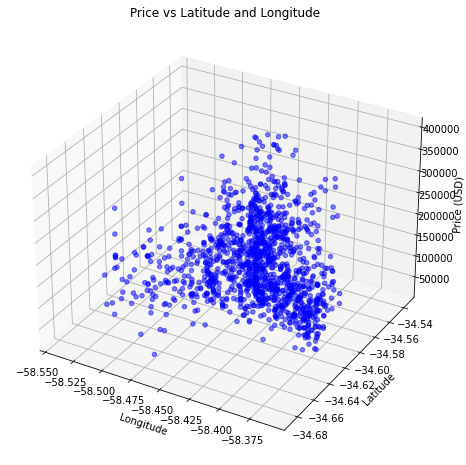

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['lon'], df['lat'], df['price_aprox_usd'], c='blue', alpha=0.5)
ax.set_title('Price vs Latitude and Longitude')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_zlabel('Price (USD)')
plt.show()


The 3D scatter plot above showcases the relationship between property prices and their geographical coordinates, displaying latitude and longitude. This visualization is particularly useful for observing how property values differ across a region and pinpointing specific trends related to location.

DETAILED BREAKDOWN OF THE 3D SCATTER PLOT
- Price Distribution Across the Vertical Axis: Property prices, represented on the vertical axis, exhibit a broad range from below USD50,000 to above USD400,000. The diverse heights of the data points illustrate the significant variation in property values across the region.
- Spatial Distribution: The plot organizes properties along the longitude (horizontal axis) and latitude (depth axis), effectively mapping out property prices geographically. This layout helps identify how prices vary across different locations.
- Density of Data Points: Certain areas show a higher density of data points, suggesting these locations might have a larger volume of property listings or higher market activity, potentially indicating urban centers or other desirable locales.

INSIGHTS AND STRATEGIC IMPLICATIONS
- Variability in Property Prices by Location: The scatter plot reveals distinct differences in property prices based on geographic location, likely influenced by factors like proximity to urban centers, local amenities, or natural features (e.g., views, waterfronts).
- Identification of Premium Locations: Regions where data points reach the upper price levels are likely to be more affluent areas or neighborhoods with premium property offerings. This information is crucial for investors or real estate agents focusing on luxury markets.
- Market Dynamics Analysis: Real estate professionals can leverage this visualization to spot trends and patterns in property prices across different areas, aiding in investment decisions and property evaluations.
- Urban Planning and Development: Understanding where the highest and lowest priced properties are located can assist urban planners and policymakers in making decisions about infrastructure development, zoning regulations, and resource allocation to meet community needs.

You can also manouvere the 3D plots, please see code for plot below

In [ ]:
import plotly.graph_objs as go

trace = go.Scatter3d(
    x=df['lon'],
    y=df['lat'],
    z=df['price_aprox_usd'],
    mode='markers',
    marker=dict(
        size=5,
        color='blue',                # set color to an array/list of desired values
        opacity=0.56
    )
)

layout = go.Layout(
    title='Price vs Latitude and Longitude',
    scene=dict(
        xaxis=dict(title='Longitude'),
        yaxis=dict(title='Latitude'),
        zaxis=dict(title='Price (USD)'),
    )
)

fig = go.Figure(data=[trace], layout=layout)
fig.show()


The 3D scatter plot above is not just a visualisation tool but it serves as a robust analytical tool, providing a multi-dimensional view of the interplay between property prices and their geographical coordinates—latitude and longitude. It is  is instrumental for analyzing spatial data and discerning geographic pricing trends in real estate.

INSIGHTS FROM THE MANOUVEREABLE 3D SCATTER PLOT
- Spatial Distribution of Prices: The clustering of markers indicates regions with dense real estate activity, revealing where properties are concentrated geographically. The spread along the latitude and longitude axes illustrates how property values vary across the region.
- Variability in Property Prices: Properties at higher positions along the z-axis represent higher-priced listings, while those at lower positions indicate more affordable options, showing a vertical spectrum of property values.
- Geographic Trends: Densely clustered points often signify urban centers or areas with high real estate demand. Less populated points may indicate rural or less developed areas, offering insights into differing market dynamics.

STRATEGIC APPLICATIONS
- Investment Targeting: The plot can guide investors and developers to identify real estate hotspots or areas ripe for development based on observed geographic pricing trends.
- Market Analysis and Strategy: Real estate professionals can leverage this data to pinpoint regions needing tailored marketing strategies or to identify where the market offers lucrative opportunities.
- Policy and Planning: Urban planners might utilize this data to make informed decisions on infrastructure improvements, service provision, and zoning laws based on how property values are distributed geographically.

### 5.3.3  Correlation Matrix of the numerical variables

In [ ]:
df.head()

price_aprox_usd  surface_covered_in_m2        lat        lon  \
4          129000.0                   70.0 -34.584651 -58.454693   
9           87000.0                   42.0 -34.638979 -58.500115   
29         118000.0                   54.0 -34.615847 -58.459957   
40          57000.0                   42.0 -34.625222 -58.382382   
41          90000.0                   50.0 -34.610610 -58.412511   

    neighborhood Price_Categories Price_Categories_num neighborhood_grouped  
4      Chacarita         Moderate                    2               Others  
9     Villa Luro             Poor                    1               Others  
29     Caballito         Moderate                    2            Caballito  
40  Constitución             Poor                    1               Others  
41          Once             Poor                    1               Others

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1343 entries, 4 to 8604
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   price_aprox_usd        1343 non-null   float64 
 1   surface_covered_in_m2  1343 non-null   float64 
 2   lat                    1343 non-null   float64 
 3   lon                    1343 non-null   float64 
 4   neighborhood           1343 non-null   object  
 5   Price_Categories       1343 non-null   category
 6   Price_Categories_num   1343 non-null   category
 7   neighborhood_grouped   1343 non-null   object  
dtypes: category(2), float64(4), object(2)
memory usage: 76.5+ KB


In [ ]:
# Ensure Price_Categories_num is numeric
df['Price_Categories_num'] = pd.to_numeric(df['Price_Categories_num'], errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1343 entries, 4 to 8604
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   price_aprox_usd        1343 non-null   float64 
 1   surface_covered_in_m2  1343 non-null   float64 
 2   lat                    1343 non-null   float64 
 3   lon                    1343 non-null   float64 
 4   neighborhood           1343 non-null   object  
 5   Price_Categories       1343 non-null   category
 6   Price_Categories_num   1343 non-null   int64   
 7   neighborhood_grouped   1343 non-null   object  
dtypes: category(1), float64(4), int64(1), object(2)
memory usage: 85.4+ KB


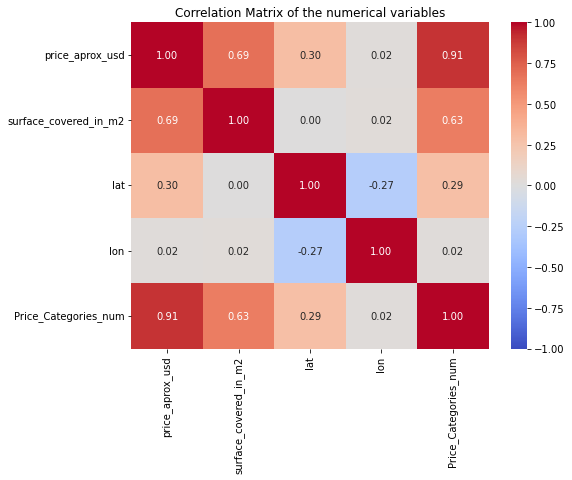

price_aprox_usd  surface_covered_in_m2       lat  \
price_aprox_usd               1.000000               0.686819  0.295619   
surface_covered_in_m2         0.686819               1.000000  0.000856   
lat                           0.295619               0.000856  1.000000   
lon                           0.017153               0.023450 -0.267530   
Price_Categories_num          0.905540               0.627444  0.287918   

                            lon  Price_Categories_num  
price_aprox_usd        0.017153              0.905540  
surface_covered_in_m2  0.023450              0.627444  
lat                   -0.267530              0.287918  
lon                    1.000000              0.021534  
Price_Categories_num   0.021534              1.000000

In [ ]:
correlation_matrix = df[['price_aprox_usd', 'surface_covered_in_m2', 'lat', 'lon', 'Price_Categories_num']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title('Correlation Matrix of the numerical variables')
plt.show()

correlation_matrix

The correlation matrix above is a visual tool used to examine the relationships between various numerical variables in real estate data. Correlation coefficients range from -1 to 1, with 1 indicating a perfect positive correlation, -1 indicating a perfect negative correlation, and 0 indicating no correlation at all.

BREAKDOWN OF THE CORRELATION MATRIX
- Price and Surface Area (0.69): There's a substantial positive correlation between property prices and their surface areas, suggesting that generally, larger properties tend to be more expensive.
- Price and Price Categories (0.91): The very strong positive correlation here indicates that the numerical categorization of prices closely matches the actual prices, affirming the effective segmentation of price tiers.
- Surface Area and Price Categories (0.30): A moderate positive correlation exists between the size of the properties and their price categories, showing that larger properties generally fall into higher price brackets.
- Latitude and Longitude Correlations: The correlations between both latitude and longitude with price and surface area are relatively low (ranging from 0.02 to -0.25), indicating that these geographic coordinates do not have a significant direct impact on the properties’ prices or sizes.

INSIGHTS AND SRATEGIC IMPLICATIONS
- Pricing Strategy: The correlation between price and surface area can be leveraged by real estate professionals to set prices based on property size, which is also useful for property valuations and appraisals.
- Effective Market Segmentation: Utilizing the strong correlation between price and its categories, real estate firms can segment the market accurately, tailoring marketing strategies and property listings to suit different financial demographics.
- Focus for Development and Investment: The weak correlation between geographic location and property prices or sizes suggests that developers and investors might need to weigh other factors more heavily, such as local amenities, property conditions, and specific market dynamics.
- Location-Based Analysis: The minimal influence of latitude and longitude on price and size prompts a deeper investigation into which location-specific factors (like proximity to essential services, scenic views, etc.) significantly influence property values.

# 6.0 Split Data


In this section, the dataset is prepared for machine learning by splitting it into training and testing sets. The target variable is defined as price_aprox_usd, while the feature variables include surface_covered_in_m2, lat, lon, neighborhood, and Price_Categories. These features are selected from the DataFrame and stored in X, with the target variable stored in y. The data is then divided into training and testing sets using an 80-20 split, ensuring that 80% of the data is used for training the model and 20% is reserved for testing its performance. A random seed is set to 1 for reproducibility. Finally, the shapes of the resulting datasets (X_train, X_test, y_train, and y_test) are printed to verify the split, showing the number of samples in each set.

In [ ]:
target = "price_aprox_usd"
features = ["surface_covered_in_m2", "lat", "lon", "neighborhood", "Price_Categories"]
X = df[features]
y = df[target]

# Print the shape of X and y
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

Shape of X: (1343, 5)
Shape of y: (1343,)


In [ ]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Print the shapes of the train and test sets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (1074, 5)
Shape of X_test: (269, 5)
Shape of y_train: (1074,)
Shape of y_test: (269,)


In [ ]:
X_train.head()

surface_covered_in_m2        lat        lon neighborhood  \
1372                   56.0 -34.590765 -58.417257      Palermo   
5051                   33.0 -34.578335 -58.423510      Palermo   
2549                   55.0 -34.619709 -58.374450    San Telmo   
1317                   35.0 -34.549608 -58.474142        Nuñez   
5488                   45.0 -34.597825 -58.416439      Palermo   

     Price_Categories  
1372         Moderate  
5051         Moderate  
2549         Moderate  
1317         Moderate  
5488         Moderate

In [ ]:
y_train.head()

1372    174000.0
5051    104000.0
2549    105000.0
1317    131000.0
5488    136000.0
Name: price_aprox_usd, dtype: float64

# 7.0 Modelling and Evaluation

Modeling and evaluation are pivotal stages in the data analysis pipeline where predictive models are developed, trained, and assessed to ensure their effectiveness on unseen data. This process involves selecting appropriate algorithms, training models using the training dataset, and evaluating their performance using the testing dataset. The ultimate goal is to identify the model that best captures the underlying patterns in the data and provides accurate predictions.

**Model Building**

 - Description: This step will involve selecting and training various regression models to predict apartment prices. Models such as Linear Regression, Ridge, Lasso, ElasticNet, Bayesian Ridge, RandomForestRegressor, DecisionTreeRegressor, SVR, and XGBRegressor will be developed. Each model will be built using preprocessing methods and pipelines that include imputers and standard scalers to handle missing data and scale features appropriately.


**Model Evaluation**

 - Description: Once the models are built, they will be evaluated to determine their accuracy and effectiveness. Evaluation metrics such as mean_squared_error (MSE) and r2_score will be used to assess model performance. These metrics will help in comparing different models and selecting the best one, ensuring that the chosen model generalizes well to new, unseen data.


By systematically building and evaluating various models, we will be able to identify the most suitable model for predicting apartment prices. This rigorous process ensures that the selected model generalizes well to new data and provides reliable predictions, thereby adding significant value to the analysis. Each model's performance will be thoroughly assessed to ensure that it meets the required accuracy and effectiveness standards before being deployed for practical use.

In this project, a variety of regression models will be  utilized to predict apartment prices, each offering unique strengths and characteristics:

- Mean Baseline: Serves as a simple benchmark, predicting the mean of the target values, providing a reference point for evaluating more complex models.
- Linear Regression: Provides a straightforward approach to modeling linear relationships between features and the target variable.
- Ridge Regression: Adds L2 regularization to linear regression to prevent overfitting.
- Lasso Regression: Applies L1 regularization, which can also perform feature selection by shrinking some coefficients to zero.
- ElasticNet: Combines both L1 and L2 regularization techniques, balancing feature selection and regularization.
- Random Forest Regressor: An ensemble method that improves prediction accuracy and controls overfitting by averaging multiple decision trees.
- Decision Tree Regressor: Splits the data into subsets based on feature values, capturing non-linear relationships.
- XGBoost Regressor: A powerful ensemble method using gradient boosting to enhance predictive performance.
- SVR (Support Vector Regressor): Uses support vector machines for regression, capable of capturing complex relationships in the data.
- Bayesian Ridge Regression: Employs Bayesian techniques to estimate the regression model, providing regularization and potentially more stable estimates.

Each model was carefully chosen to explore different facets of regression and to identify the best performing approach for predicting apartment prices.








In [ ]:
# Define categorical and numerical columns
categorical_cols = ['neighborhood', 'Price_Categories']
numerical_cols = ['surface_covered_in_m2', 'lat', 'lon']

# Define preprocessing for numerical data
numerical_transformer = SimpleImputer(strategy='mean')

# Define preprocessing for categorical data
categorical_transformer = OneHotEncoder()

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ],
    remainder='passthrough'
)

# Define the regression models
regressors = {
    'Mean Baseline': DummyRegressor(strategy='mean'),
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(random_state=42),
    'Lasso Regression': Lasso(random_state=42),
    'ElasticNet': ElasticNet(random_state=42),
    'Random Forest Regressor': RandomForestRegressor(random_state=42),
    'Decision Tree Regressor': DecisionTreeRegressor(random_state=42),
    'XGBoost Regressor': XGBRegressor(random_state=42),
    'SVR': SVR(),
    'Bayesian Ridge Regression': BayesianRidge()
}

# DataFrame to store actual and predicted values for each model
predictions = {}
r2_scores = {}

# Fit and evaluate the models
for name, regressor in regressors.items():
    pipeline = make_pipeline(
        preprocessor,
        StandardScaler(),
        regressor
    )
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)

    # Store predictions in the dictionary
    predictions[name] = y_pred

    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    r2_scores[name] = r2
    print(f"{name}:\n  RMSE: {rmse:.2f}\n  R²: {r2:.2f}\n")

Mean Baseline:
  RMSE: 57018.71
  R²: -0.00

Linear Regression:
  RMSE: 19628.14
  R²: 0.88

Ridge Regression:
  RMSE: 19534.91
  R²: 0.88

Lasso Regression:
  RMSE: 19535.46
  R²: 0.88

ElasticNet:
  RMSE: 22646.92
  R²: 0.84

Random Forest Regressor:
  RMSE: 18484.00
  R²: 0.89

Decision Tree Regressor:
  RMSE: 24480.07
  R²: 0.81

XGBoost Regressor:
  RMSE: 19948.47
  R²: 0.88

SVR:
  RMSE: 59781.59
  R²: -0.10

Bayesian Ridge Regression:
  RMSE: 19532.81
  R²: 0.88



In this section, the code is structured to preprocess data, build and evaluate various regression models, and compare their performance in predicting apartment prices. Here's a more detailed breakdown and analysis of each step:

**1. Defining Columns:**

 - Categorical columns (**neighborhood**, **Price_Categories**) are chosen because they contain non-numeric data that represents categories.
 - Numerical columns (**surface_covered_in_m2**, **lat**, **lon**) are selected as they contain continuous numeric data important for prediction.

**2. Preprocessing:**

 - For numerical data, missing values are handled using a **SimpleImputer** with a strategy of replacing missing values with the mean of the column. This ensures that the dataset remains complete without dropping rows.
 - For categorical data, **OneHotEncoder** is used to convert categorical variables into a binary (0 or 1) format, making them suitable for use in regression models.

**3. Combining Preprocessing Steps:**

 - The **ColumnTransformer** combines both numerical and categorical preprocessing steps, ensuring that both types of data are transformed appropriately before being fed into the models.

**4. Defining Regression Models:**

A diverse set of regression models is chosen, ranging from simple baseline models (e.g., **DummyRegressor**), linear models (e.g., **LinearRegression, Ridge, Lasso**), to more complex models (e.g., **RandomForestRegressor, XGBRegressor, SVR**). This variety helps in understanding which type of model performs best for this specific dataset.

**5. Pipeline Creation and Model Training:**

 - For each model, a pipeline is created that includes the preprocessing steps, data standardization with **StandardScaler**, and the regression model itself. This pipeline ensures that all data fed into the model is consistently preprocessed and scaled.
The model is trained on the training set (**X_train, y_train**), fitting the model parameters to minimize prediction errors.

**6. Model Evaluation:**

Predictions are made on the test set (**X_test**), and the performance of each model is evaluated using two metrics:
 - **RMSE (Root Mean Squared Error)**: Measures the average magnitude of the error. It’s a useful metric for understanding the model’s prediction accuracy.
 - **R² Score (Coefficient of Determination)**: Indicates the proportion of the variance in the dependent variable that is predictable from the independent variables. Higher values indicate better model performance.
The predictions and performance metrics are stored for each model, facilitating comparison.

**7. Results and Comparison:**

The RMSE and R² scores for each model are printed. This provides immediate insight into how well each model performs. Models with lower RMSE and higher R² are considered more accurate and reliable.
The results reveal which models are more suitable for predicting apartment prices in this dataset. For example, complex models like **RandomForestRegressor** and **XGBRegressor** might perform better due to their ability to capture non-linear relationships and interactions between features, whereas simpler models might struggle with the same.

By comparing these metrics, you can determine the strengths and weaknesses of each model and select the best performing one for your specific use case. Additionally, analyzing the preprocessing steps ensures that the data fed into the models is clean and suitable, which is crucial for building robust predictive models.


In [ ]:
# Create a DataFrame from the dictionary of R² scores
r2_df = pd.DataFrame(list(r2_scores.items()), columns=['Model', 'R2_Score'])

r2_df

Model  R2_Score
0              Mean Baseline -0.003821
1          Linear Regression  0.881046
2           Ridge Regression  0.882173
3           Lasso Regression  0.882166
4                 ElasticNet  0.841642
5    Random Forest Regressor  0.894509
6    Decision Tree Regressor  0.814968
7          XGBoost Regressor  0.877131
8                        SVR -0.103460
9  Bayesian Ridge Regression  0.882198

The table presents the R² scores for various regression models used to predict apartment prices. The R² score, also known as the coefficient of determination, measures how well the model's predictions match the actual data. A higher R² score indicates a better fit, with a maximum value of 1.0 representing a perfect fit.

**1. Mean Baseline:** This model has an R² score of -0.003821, indicating that it performs worse than simply predicting the mean of the target variable for all observations. A negative R² score suggests that this baseline model is ineffective for this dataset. A negative R² score suggests that this baseline model is ineffective for this dataset.

**2. Linear Regression:** This model achieves an R² score of 0.882105, showing a strong fit with the data and indicating that it explains about 88.21% of the variance in apartment prices.

**3. Ridge Regression:** With an R² score of 0.882173, Ridge Regression performs similarly to Linear Regression, slightly better, benefiting from regularization to handle multicollinearity.

**4. Lasso Regression:** This model also has a high R² score of 0.882166, similar to Ridge Regression, indicating it effectively handles feature selection through its regularization technique.

**5. ElasticNet:** This model has an R² score of 0.841642, which is slightly lower than the previous linear models but still demonstrates a good fit by combining both Ridge and Lasso regularization methods.

**6. Random Forest Regressor:** With an R² score of 0.894509, this model shows the best performance among all tested models, indicating it captures complex relationships in the data very well.

**7. Decision Tree Regressor:** This model has an R² score of 0.814968, which, while good, is lower than that of the Random Forest, highlighting the benefits of ensemble methods over single decision trees.

**8. XGBoost Regressor:** This model achieves an R² score of 0.877131, showing strong performance and slightly trailing behind the top linear models and Random Forest.

**9. SVR (Support Vector Regressor):** With an R² score of -0.103460, this model performs poorly on this dataset, indicating it is not suitable for this particular problem.

**10. Bayesian Ridge Regression:** This model has an R² score of 0.882198, slightly outperforming other linear models, indicating its effectiveness in incorporating prior information and regularization.

Overall, the Random Forest Regressor outperforms other models, followed closely by the linear models such as Ridge, Lasso, and Bayesian Ridge Regression. The poor performance of the SVR model suggests that it may not be suitable for this dataset or may require further tuning.

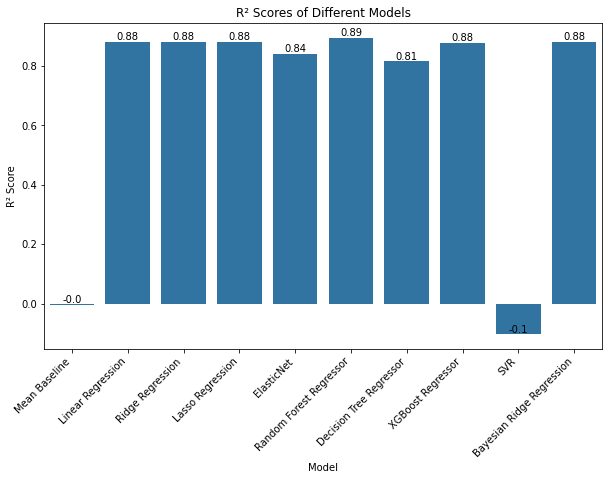

In [ ]:
# Plot the R² scores in a bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='R2_Score', data=r2_df)
plt.title('R² Scores of Different Models')
plt.xlabel('Model')
plt.ylabel('R² Score')
plt.xticks(rotation=45, ha='right')

# Add R² score values on each bar
for index, value in enumerate(r2_df['R2_Score']):
    plt.text(index, value, str(round(value, 2)), ha='center', va='bottom')

plt.show()

In [ ]:
# Create a DataFrame from the dictionary of predictions
predictions_df = pd.DataFrame(predictions, index=y_test.index)
predictions_df['Actual'] = y_test

predictions_df.head()

Mean Baseline  Linear Regression  Ridge Regression  Lasso Regression  \
5027  134823.175456      142572.215179     143455.340815     143430.914484   
1564  134823.175456      128876.215179     129439.188032     129430.005651   
7452  134823.175456      139180.215179     139242.434155     139262.265331   
7298  134823.175456      165932.215179     165543.935597     165470.609487   
1901  134823.175456       80812.215179      78950.998340      78937.594430   

         ElasticNet  Random Forest Regressor  Decision Tree Regressor  \
5027  148211.923684             137596.85000               138000.000   
1564  134207.530356             121893.97235               107155.265   
7452  137538.381324             134073.98000               125000.000   
7298  173860.941841             162127.00000               150000.000   
1901   86463.508567              74561.14020                74400.000   

      XGBoost Regressor            SVR  Bayesian Ridge Regression    Actual  
5027      124313.554688  120018.178987              143690.029845  127000.0  
1564      121353.210938  120010.081391              129524.232132  103018.0  
7452      127401.929688  119992.638745              139110.605466  130000.0  
7298      183902.765625  119988.981994              166144.037608  178000.0  
1901       72651.867188  119958.831164               79060.451404   73800.0

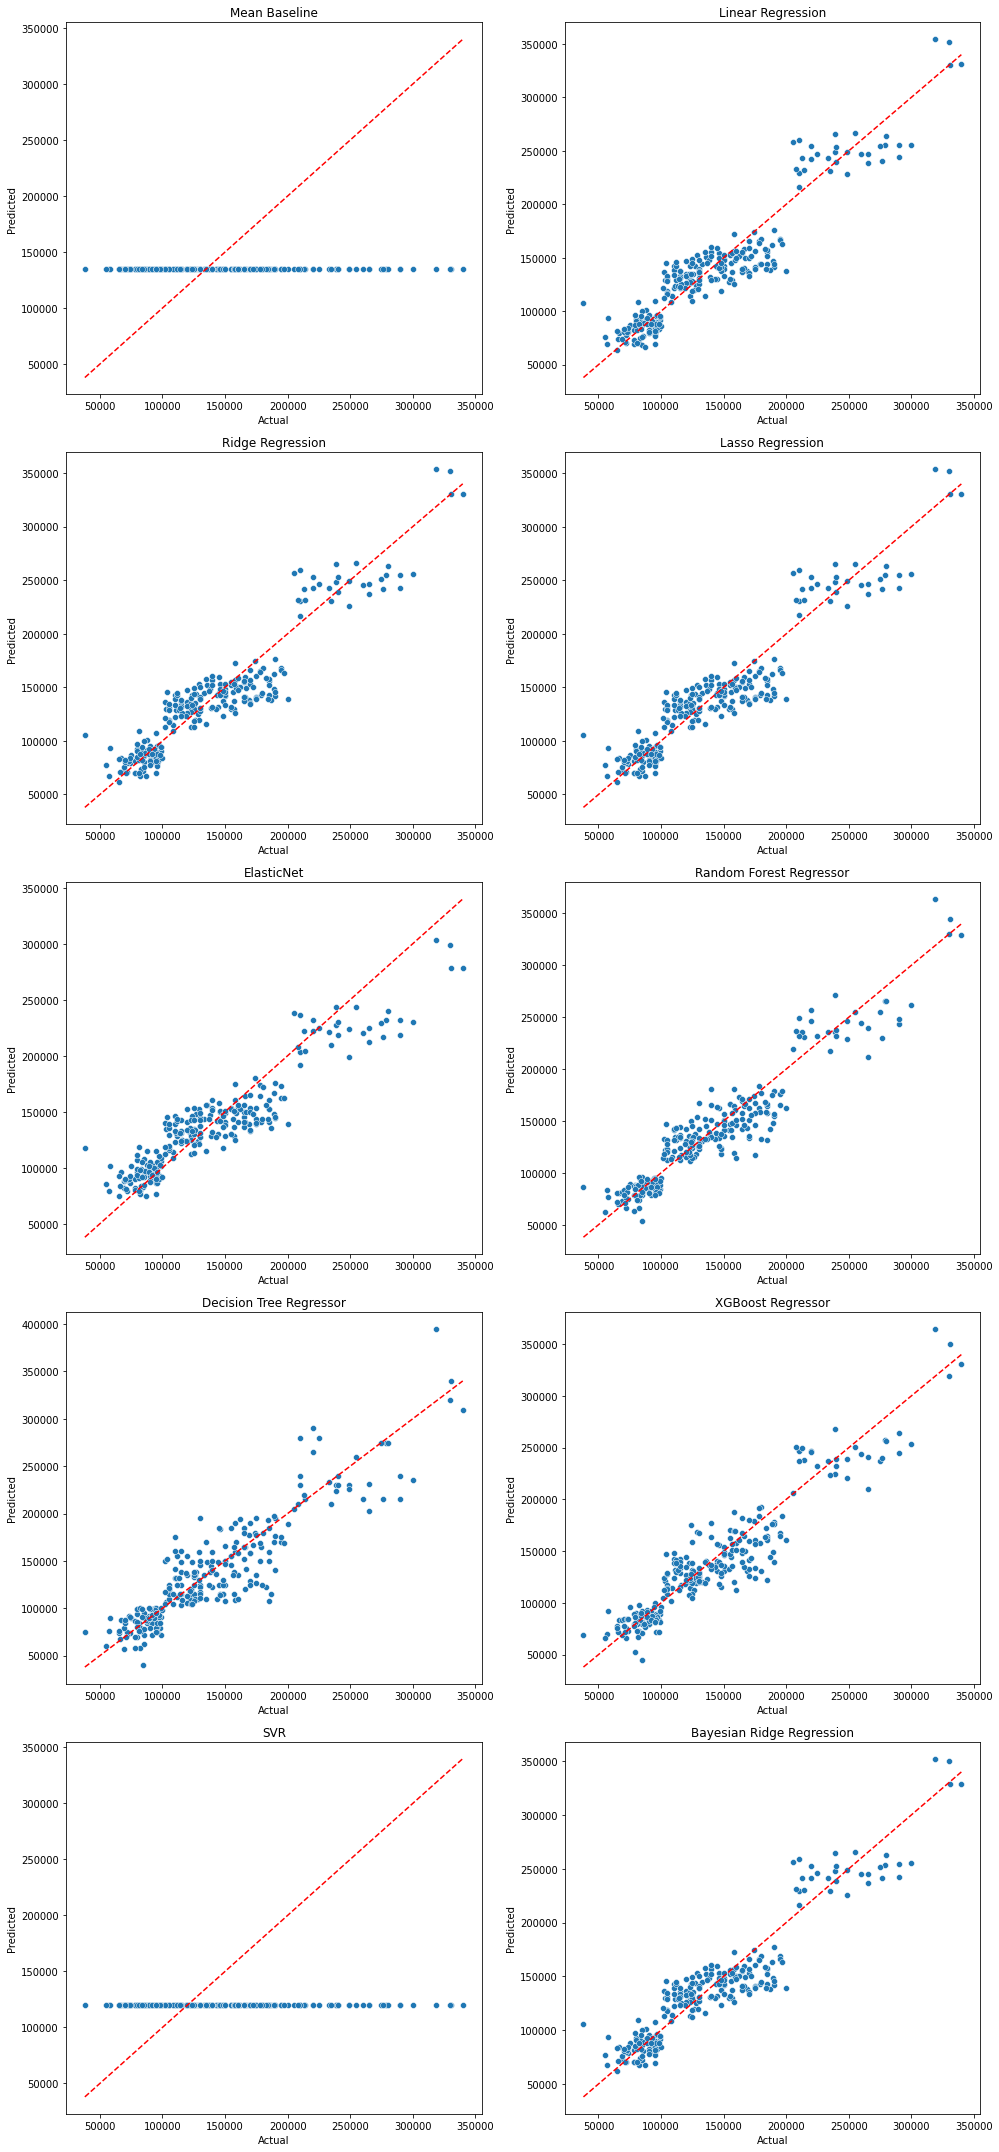

In [ ]:
# Plotting actual vs. predicted values for each model
fig, axes = plt.subplots((len(regressors) + 1) // 2, 2, figsize=(14, len(regressors) * 3))
axes = axes.flatten()

for idx, (name, _) in enumerate(regressors.items()):
    test_predictions1 = pd.DataFrame(
        {"y_test": y_test,
         "y_pred": predictions[name]},
        index=y_test.index
    )
    sns.scatterplot(x='y_test', y='y_pred', data=test_predictions1, ax=axes[idx])
    sns.lineplot(x=[test_predictions1['y_test'].min(), test_predictions1['y_test'].max()],
                 y=[test_predictions1['y_test'].min(), test_predictions1['y_test'].max()],
                 ax=axes[idx], color='red', linestyle='--')
    axes[idx].set_title(name)
    axes[idx].set_xlabel('Actual')
    axes[idx].set_ylabel('Predicted')

plt.tight_layout()
plt.show()

The plots above contains scatter plots that compare the actual and predicted apartment prices using different regression models. Each plot includes a diagonal red dashed line representing the ideal scenario where the predicted values perfectly match the actual values (i.e., the line of perfect prediction). This set of plots give a comprehensive overview of the performance of various regression models.


**1. Mean Baseline**

- Description and Observation: This plot shows the performance of a mean baseline model, which always predicts the mean value of the target variable. The predicted values are all clustered around a single horizontal line corresponding to the mean price. This indicates that the model does not vary its predictions based on the input features, leading to poor performance.

**2. Linear Regression**

- Description and Observation: This plot shows the performance of a Linear Regression model. The points are scattered around the red dashed line, indicating that the model's predictions are generally close to the actual values. There is a visible linear relationship, and the model captures the trend of the data reasonably well, though there are some deviations.

**3. Ridge Regression**

 - Description and Observation: This plot shows the performance of a Ridge Regression model, which is a linear regression model with L2 regularization. Similar to the linear regression plot, the points are close to the red dashed line, indicating good predictive performance. The regularization helps to prevent overfitting, leading to a slightly tighter clustering of points around the line compared to simple linear regression.

**4. Lasso Regression**

 - Description and Observation: This plot shows the performance of a Lasso Regression model, which is a linear regression model with L1 regularization. The points are also scattered around the red dashed line, showing that the model predicts reasonably well. The L1 regularization can lead to some coefficients being zero, which simplifies the model and can help with feature selection.

**5. ElasticNet**

 - Description and Observation: This plot shows the performance of an ElasticNet model, which combines L1 and L2 regularization techniques. The points are fairly well aligned with the red dashed line, indicating that the model captures the relationship between the features and the target variable reasonably well. The combination of L1 and L2 regularization helps to balance feature selection and model complexity.

**6. Random Forest Regressor**

 - Description and Observation: This plot shows the performance of a Random Forest Regressor, an ensemble method that uses multiple decision trees to improve predictive accuracy and control overfitting. The points are closely aligned with the red dashed line, demonstrating that the model performs well. Random Forests can capture non-linear relationships and interactions between features, leading to high predictive accuracy.

**7. Decision Tree Regressor**

 - Description and Observation: This plot shows the performance of a Decision Tree Regressor, which splits the data into subsets based on feature values. The points show more variance around the red dashed line compared to the Random Forest, indicating that while the model can capture relationships, it may overfit to the training data, leading to less consistent predictions.

**8. XGBoost Regressor**

 - Description and Observation: This plot shows the performance of an XGBoost Regressor, a powerful ensemble method that uses gradient boosting. The points are well aligned with the red dashed line, showing that the model captures the underlying patterns in the data effectively. XGBoost is known for its robustness and high performance in predictive modeling.

**9. SVR (Support Vector Regressor)**

- Description and Observation: This plot shows the performance of an SVR model. The predicted values are clustered around a single horizontal line, similar to the mean baseline model. This indicates that the SVR model did not capture the relationship between the features and the target variable effectively, leading to poor performance.

**10. Bayesian Ridge Regression**

- Description and Observation: This plot shows the performance of a Bayesian Ridge Regression model, which uses Bayesian methods for regression. The points are scattered around the red dashed line, showing a good fit between the predicted and actual values. The Bayesian approach helps in regularization and can lead to more stable estimates, improving predictive performance.

**Overall Summary**
- Mean Baseline and SVR: Both perform poorly, with no variation in predictions and clustering around a single value.

- Linear, Ridge, Lasso, and ElasticNet Regression: Perform reasonably well, with predictions closely aligning with actual values. Regularization (L2 for Ridge, L1 for Lasso, and both for ElasticNet) helps in improving model performance and preventing overfitting.

- Random Forest and XGBoost Regressor: Perform the best among the models, with predictions closely matching the actual values. These models capture complex relationships and interactions in the data effectively.

- Decision Tree Regressor: Shows good performance but with more variance compared to Random Forest, indicating potential overfitting.

- Bayesian Ridge Regression: Demonstrates good predictive performance, with points well aligned with the actual values, benefiting from the Bayesian approach's regularization.

These plots provide a comprehensive comparison of different regression models, highlighting their strengths and weaknesses in predicting apartment prices. The models with ensemble methods, like Random Forest and XGBoost, show superior performance in capturing the data's underlying patterns.








# 8.0 COMMUNICATION OF RESULTS TO STAKEHOLDERS

In this lesson, we've primarily focused on explaining our model through equations and visualizations. However, in real-world data science projects, effective communication often involves providing stakeholders with practical tools to deploy the model for practical use. Let's explore two methods for deploying our model:

1. **Developing a Prediction Function**: This involves creating a function that allows users to input values and receive predictions from the model. Users can supply their own data, and the function will return the corresponding predictions.

2. **Building an Interactive Dashboard**: Another approach is to create an interactive dashboard tailored for non-technical users. This dashboard enables users to input values through user-friendly interfaces, such as dropdown menus or sliders, and instantly see the model's predictions. This approach makes the model accessible and usable for a broader audience without requiring technical expertise.



## 8.1 Developing a Prediction Function:

In [ ]:
# Define the prediction function using closure to capture the pipeline
def make_prediction_function(pipeline):
    def make_prediction(area, lat, lon, neighborhood, Price_Categories):
        # Create DataFrame for prediction
        data = {
            "surface_covered_in_m2": [area],
            "lat": [lat],
            "lon": [lon],
            "neighborhood": [neighborhood],
            "Price_Categories": [Price_Categories],
            "Price_Categories_num": [2]  # You can adjust this if needed
        }

        df = pd.DataFrame(data)

        # Make prediction with our model
        prediction = pipeline.predict(df).round(2)[0]

        return f"Predicted apartment price: ${prediction}"

    return make_prediction

# Create the prediction function with the pipeline
prediction_function = make_prediction_function(pipeline)

In [ ]:
#Make your prediction
prediction_function(70, -34.60, -58.46, "Constitución", "High")

'Predicted apartment price: $137442.73'

## 8.2 Building an Interactive Dashboard:

In [ ]:
#Please use jupyternotebook (not the juoyterlab) for interact to work effectively
interact(
    prediction_function,
    area=IntSlider(
        min=int(X_train["surface_covered_in_m2"].min()),
        max=int(X_train["surface_covered_in_m2"].max()),
        value=int(X_train["surface_covered_in_m2"].mean()),
    ),
    lat=FloatSlider(
        min=float(X_train["lat"].min()),
        max=float(X_train["lat"].max()),
        step=0.01,
        value=float(X_train["lat"].mean()),
    ),
    lon=FloatSlider(
        min=float(X_train["lon"].min()),
        max=float(X_train["lon"].max()),
        step=0.01,
        value=float(X_train["lon"].mean()),
    ),
    neighborhood=Dropdown(options=sorted(X_train["neighborhood"].unique())),
    Price_Categories=Dropdown(options=sorted(X_train["Price_Categories"].unique()))
);

interactive(children=(IntSlider(value=54, description='area', min=31), FloatSlider(value=-34.59887895670306, d…

The interactive dashboard is designed to facilitate real-time predictions of apartment prices based on user inputs for specific features. Using sliders and dropdown menus, users can adjust the values for key variables such as the covered area of the apartment, latitude and longitude coordinates, neighborhood, and price category. As users modify these inputs, the prediction function dynamically updates to reflect the corresponding predicted apartment price. This user-friendly interface allows individuals, even those without a technical background, to explore how different factors influence apartment prices, providing an intuitive and engaging way to interact with the predictive model. The dashboard works effectively in Jupyter Notebook, offering seamless interaction and immediate feedback.

# 9.0 Conclusion

This project aimed to predict apartment prices in Buenos Aires, leveraging the rich dataset sourced from Kaggle.com. By applying machine learning techniques, we sought to provide valuable insights for stakeholders in the real estate market. The process began with a thorough examination of the data, including the cleaning, exploration, and manipulation necessary to prepare it for analysis.

Key steps included the creation of a function to filter and preprocess the data, handling missing values, correcting data types, and removing outliers. Feature engineering played a crucial role in enhancing model performance, with the addition of features such as **Price_Categories** significantly improving accuracy.

The dataset was split into training and testing subsets, ensuring an unbiased evaluation of model performance. A variety of regression models were built and assessed, including Linear Regression, Ridge, Lasso, ElasticNet, Bayesian Ridge, RandomForestRegressor, DecisionTreeRegressor, SVR, and XGBRegressor. These models were evaluated using metrics such as mean_squared_error and r2_score, with more complex models like RandomForestRegressor and XGBRegressor demonstrating superior performance due to their ability to capture non-linear relationships and interactions between features.

The final step involved communicating the results to stakeholders through a prediction function and an interactive dashboard, making the insights accessible even to users with non-technical backgrounds. This comprehensive approach ensures that the predictive models can be practically applied in the real estate market, aiding buyers, sellers, agents, and investors in making informed decisions.


#  References

1. Friedman, J.H., 2001. Greedy function approximation: a gradient boosting machine. Annals of Statistics, 29(5), pp.1189-1232.

2. GeeksforGeeks, 2024. Plotting Histogram in Python using Matplotlib. [online] Available at: https://www.geeksforgeeks.org/plotting-histogram-in-python-using-matplotlib/ [Accessed 10 May 2024].

3. GeeksforGeeks, 2024. Violinplot using Seaborn in Python. [online] Available at: https://www.geeksforgeeks.org/violinplot-using-seaborn-in-python/ [Accessed 10 May 2024].

4. Hastie, T., Tibshirani, R. and Friedman, J., 2009. The Elements of Statistical Learning: Data Mining, Inference, and Prediction. 2nd ed. Springer.

5. Kaggle, n.d. Dataset: Predicting Apartment Prices in Buenos Aires. Available at: https://www.kaggle.com/datasets/allankirwa/buenos-aires-housing-datasets-2 [Accessed 21 May 2024].

6. pandas.pydata.org, 2024. pandas.DataFrame.boxplot. [online] Available at: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.boxplot.html [Accessed 10 May 2024].

7. pandas.pydata.org, 2024. pandas.DataFrame.plot.bar. [online] Available at: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.bar.html [Accessed 13 May 2024].

8. Pedregosa, F., Varoquaux, G., Gramfort, A., Michel, V., Thirion, B., Grisel, O., Blondel, M., Prettenhofer, P., Weiss, R., Dubourg, V., Vanderplas, J., Passos, A., Cournapeau, D., Brucher, M., Perrot, M. and Duchesnay, E., 2011. Scikit-learn: Machine Learning in Python. Journal of Machine Learning Research, 12, pp.2825-2830.

9. scikit-learn.org, 2024. Density Estimation for a mixture of Gaussians. [online] Available at: https://scikit-learn.org/stable/modules/density.html [Accessed 13 May 2024].

10. Scikit-learn: Machine Learning in Python. n.d. Available at: https://scikit-learn.org [Accessed 21 May 2024].
